# FINAL PROJECT DEEP LEARNING 2020

This notebook was constructed for my final project in the Deep Learning lectures 
taught by Clécio De Bom in 2020. ([clearnightsarethebest.com](https://clearnightsrthebest.com/))

My objective is to classify astrophysical spectra into Supernovas (Type Ia, Ib, Ic and II) or Kilonovas. For that, I assembled a dataset of kilonova spectra retrieved from [The Open Kilonova Catalog](https://kilonova.space/) and supernova spectra retrieved from [DASH](https://astrodash.readthedocs.io/en/latest/). DASH by itself is already composed of various datasets and not all of them were used here, more specifically the **superfit** templates. You can download this dataset from [Github/dahowell/superfit](https://github.com/dahowell/superfit) or try using data from other surveys in [DASH](http://www.danielmuthukrishna.com/wp-content/uploads/2016/12/DASH.pdf) (Aqui é o link da tese do Daniel).

I'll make a quick introduction to supernovae and kilonovae, and the classification of their spectra.

## Supernovae and Kilonovae

### Supernovae

A supernova is, in a few words, a stellar explosion caused by the core colapse of a massive star in the end of it's life, or by the ignition of nuclear fusion at the core of a white dwarf.

Stars live thanks to a delicate balance between gravity and the internal pressure as a result of the nuclear fusion. The star begins fusing hydrogen into helium, mostly following the proton-proton chain (If you're curious about it, try reading this review paper [Energy Production in Stars](https://journals.aps.org/pr/abstract/10.1103/PhysRev.55.434)). After fusing helium, the star proceeds fusing helium into carbon, carbon into oxigen and neonium, and so on, until it hits iron. Iron is the chemical element with the highest biding energy per nucleon, meaning that in order to keep fusing iron into other elements, the star needs to spend energy, therefore the process is no longer susteinable and the fusion reaction stops. Sadly, for the star, gravity does not share this desire to stop and without the nuclear pressure to keep the star from collapsing, the outter shells of the star come crushing down on top of the iron core. Eventually, the pressure on top of the core is so big it cannot be compressed anymore and it becomes rigid. The outter shells than bounce of the rigid nucleous, creating a shock wave that expels the stellar material towards space with violent force A.K.A. a supernova.

But as I said, supernovas might also happen in another context. When a white dwarf star (If you do not know what a white dwarf is, I highly recommend you the following video from the youtube channel Kurzgesagt [White Dwarfs & Black Dwarfs](https://www.youtube.com/watch?v=qsN1LglrX9s&ab_channel=Kurzgesagt%E2%80%93InaNutshell)) gathers enough mass to initiate the nuclear fusion on it's core. This mass may come from a star companion that involuntary donates mass to the white dwarf (WD) due to the WD's gravitational pull. The exact mechanism in which this supernova occurs is still (at least to the date of writing of this notebook) unkown [1], and because of that I will not give it many detailed decriptions. Also, this gap in our knowledge makes this type os supernova quite interesting for astronomical surveys.

There are actually 4 main types of supernova, which will be the ones I attempt to classify here. They are all classified by the presence of some specific elements on it's spectrum. If they have signs of hydrogen in their spectrum, they are type II, if not they are type I, for example. The details of each main type is given bellow

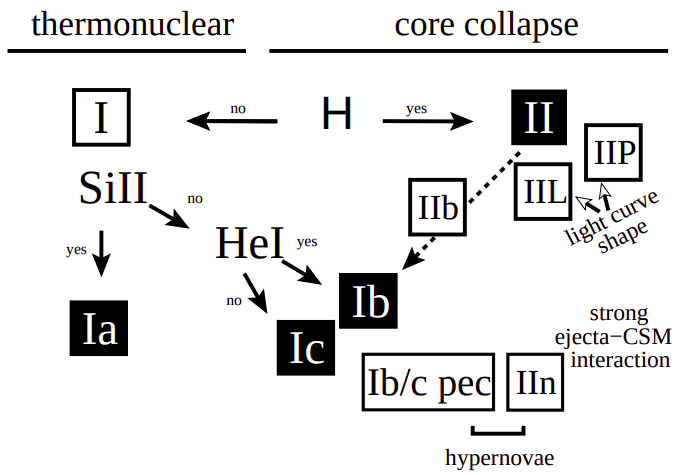

Image taken from [2].

### Kilonovae

Now kilonovas are a completly different story. They involve a much more extreme type of star: a neutron star! (If you don't know what neutron stars are, well, firstly you're missing an awesome astrophysical object, but I recommend you this video, also from Kurzgesagt [Neutron Stars](https://www.youtube.com/watch?v=udFxKZRyQt4&ab_channel=Kurzgesagt%E2%80%93InaNutshell)).

They happen when two neutron stars collide, or sometimes when a neutron star collides with a black hole. Due to the heavy presence of atomic nucleons in the neutron star, the collision creates a rapid neutron capture process, know as r-process, that generates large amounts of electromagnetic radiation and ejects matter in form of heavy nuclei[3,4].

### References of this section

1. [Reconciling 56Ni Production in Type Ia Supernovae with Double Degenerate Scenarios](https://arxiv.org/abs/1308.0334)
2. [Classification of Supernovae](https://arxiv.org/abs/astro-ph/0301107)
3. [Origin of the heavy elements in binary neutron-star mergers from a gravitational-wave event](https://www.nature.com/articles/nature24453?foxtrotcallback=true)
4. [A 'kilonova' associated with the short-duration gamma-ray burst GRB 130603B](https://www.nature.com/articles/nature12505)

## Installing libraries

To begin my project, I install all necessary libraries that are going to be used in my code, I divide them by sections for a better understandig of what they do.

In [ ]:
# INSTALLING DASH FOR COMPARISION OF MY CLASSIFICATIONS
!pip install astrodash --upgrade
import astrodash

# BASIC PYTHON LIBRARIES TO PERFORM MATHEMATICAL CALCULATIONS, PLOT GRAPHS, IMPORT STUFF...
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import integrate
from math import sqrt

# KERAS LIBRARIES FOR BUILDING THE NEURAL NETWORK
from keras import models
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D, Dropout, MaxPool1D, BatchNormalization, LSTM
from keras.utils import to_categorical
from keras import callbacks

# SCIKIT LEARN AND SCIPY LIBRARIES FOR DATA PREPROCESSING
from sklearn.model_selection import train_test_split
from scipy.signal import medfilt
from sklearn.utils.class_weight import compute_class_weight

# SCIKIT LEARN LIBRARIES FOR METRICS
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

# USEFUL TOOLS
import json
import h5py
from scipy import interp
from itertools import cycle
from __future__ import division
from __future__ import print_function
import random
import itertools as it

     |████████████████████████████████| 81kB 4.9MB/s 
     |████████████████████████████████| 829kB 9.8MB/s 
This download contains the Tensorflow models trained using deep learning. 
The file to be downloaded is ~200MB. However, this is a one time download, and will only occur
the very first time that this version of DASH is installed.
Download complete! File saved to /usr/local/lib/python3.6/dist-packages/astrodash/models_v06.zip.
Unzipping data files...
Data files installed!


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


Instructions for updating:
non-resource variables are not supported in the long term


## Creating dataset

OK, so here I'll show you how I created my dataset using the Open Kilonova Datalog and the superfit templates from [DASH](https://arxiv.org/pdf/1903.02557.pdf). For most of my work, I use as main reference the Doctoral Thesis of Daniel Muthukrishna [Deep Learning for the Spectral Classification of
Transient Astronomical Objects](http://www.danielmuthukrishna.com/wp-content/uploads/2016/12/DASH.pdf), so I highly recommend you to read it if you have any doubt in what I'm doing.

I began by downloading all files from the DASH repository online in [Github/daniel-muthukrishna/astrodash](https://github.com/daniel-muthukrishna/astrodash). However, I did not use the complete dataset, so you can directly download the superfit dataset from [Github/dahowell/superfit](https://github.com/dahowell/superfit), you'll just have to make minor changes to the code (I think).

So, the first thing to do is to get access my google drive (or yours, if you're trying to replicate this code). That can be achieved using the **google.colab.drive** library and calling the function *mount*.

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


### SNID

In [ ]:
def read_all_atels(atelTextFile):
    """ Read the text file containing all OzDES ATel
    Returns the names, redshifts, type, phase and notes from the ATel
    atels Index(['Name', 'RA (J2000)', 'Dec (J2000)', 'Discovery Date (UT) ',
       'Discovery Mag (r)', 'Spectrum Date (UT)', 'Redshift', 'Type', 'Phase',
       'Notes'],
      dtype='object')
    """

    atels = pd.read_csv(atelTextFile, delimiter='|')
    atels['Name'] = atels['Name'].str.strip()
    pd.to_numeric(atels['Redshift'])
    atels['Filename'] = ''

    return atels

In [ ]:
path = 'gdrive/MyDrive/DeepLearning/Astrodash/templates/peu_corrected'

spectra = os.listdir(path)

In [ ]:
df = pd.read_csv(path + '/' + spectra[14], header = None, sep = '   ')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [ ]:
df

,0,1
0,0.00,12.2
1,2501.69,0.0
2,2505.08,0.0
3,2508.48,0.0
4,2511.87,0.0
...,...,...
1020,9939.27,0.0
1021,9952.73,0.0
1022,9966.21,0.0
1023,9979.72,0.0


In [ ]:
for j in range(len(df.columns)):
  df = df.rename(columns={j: f'Column {j}'})

In [ ]:
spectra

['sn1997X.lnw',
 'sn1998fa.lnw',
 'sn2000er.lnw',
 'sn2001ai.lnw',
 'sn2001ej.lnw',
 'sn2001gd.lnw',
 'sn2002ao.lnw',
 'sn2002ji.lnw',
 'sn2003dh.lnw',
 'sn2003lw.lnw',
 'sn2004dk.lnw',
 'sn2004dn.lnw',
 'sn2004eu.lnw',
 'sn2004ff.lnw',
 'sn2004ge.lnw',
 'sn2004gt.lnw',
 'sn2004gv.lnw',
 'sn2005ar.lnw',
 'sn2005da.lnw',
 'sn2005ek.lnw',
 'sn2005kf.lnw',
 'sn2005la.lnw',
 'sn2005mf.lnw',
 'sn2005nb.lnw',
 'sn2005U.lnw',
 'sn2006ck.lnw',
 'sn2006el.lnw',
 'sn2006ep.lnw',
 'sn2006fo.lnw',
 'sn2006lc.lnw',
 'sn2006ld.lnw',
 'sn2006lv.lnw',
 'sn2006T.lnw',
 'sn2007ag.lnw',
 'sn2007bg.lnw',
 'sn2007ce.lnw',
 'sn2007cl.lnw',
 'sn2007D.lnw',
 'sn2007I.lnw',
 'sn2007kj.lnw',
 'sn2007ru.lnw',
 'sn2007rz.lnw',
 'sn2007uy.lnw',
 'sn2008an.lnw',
 'sn2008aq.lnw',
 'sn2008bo.lnw',
 'sn2008cw.lnw',
 'sn2009bb.lnw',
 'sn2009er.lnw',
 'sn2009iz.lnw',
 'sn2009mg.lnw',
 'sn2009nz.lnw',
 'sn2010ay.lnw',
 'sn2010ma.lnw',
 'sn2011bm.lnw',
 'sn2011fu.lnw',
 'sn2012ap.lnw',
 'sn2012bz.lnw',
 'sn2013cq.lnw',
 '

In [ ]:
total = pd.DataFrame({'x': [np.nan for i in range(1500)]})

In [ ]:
#substituir 0 pra -999

#tentar usar o assert no loop pra montar o dataframe

total

,x,Wavelen_sn1997X,sn1997X_age: 0.0,sn1997X_age: 2.0,sn1997X_age: 5.0,sn1997X_age: 7.0,sn1997X_age: 10.0,sn1997X_age: 26.0,Wavelen_sn1998fa,sn1998fa_age: -4.1,sn1998fa_age: -3.1,sn1998fa_age: 18.3,Wavelen_sn2000er,sn2000er_age: 4.7,sn2000er_age: 5.7,sn2000er_age: 6.7,sn2000er_age: 8.7,sn2000er_age: 9.7,Wavelen_sn2001ai,sn2001ai_age: 0.0,sn2001ai_age: 28.0,Wavelen_sn2001ej,sn2001ej_age: 0.0,sn2001ej_age: 1.0,sn2001ej_age: 2.0,sn2001ej_age: 29.0,sn2001ej_age: 33.0,sn2001ej_age: 55.0,sn2001ej_age: 61.0,sn2001ej_age: 62.0,Wavelen_sn2001gd,sn2001gd_age: 0.0,sn2001gd_age: 47.0,Wavelen_sn2002ao,sn2002ao_age: 21.6,sn2002ao_age: 23.6,sn2002ao_age: 28.3,sn2002ao_age: 30.6,Wavelen_sn2002ji,sn2002ji_age: 0.0,...,sn2002ji_age: 38.0,sn2002ji_age: 40.0,sn2002ji_age: 55.0,sn2002ji_age: 56.0,Wavelen_sn2003dh,sn2003dh_age: -9.8,sn2003dh_age: -9.0,sn2003dh_age: -8.1,sn2003dh_age: -7.3,sn2003dh_age: -6.4,sn2003dh_age: 5.6,sn2003dh_age: 12.4,sn2003dh_age: 14.1,sn2003dh_age: 17.5,sn2003dh_age: 30.4,sn2003dh_age: 56.1,Wavelen_sn2003lw,sn2003lw_age: -2.0,sn2003lw_age: 7.1,Wavelen_sn2004dk,sn2004dk_age: 14.2,sn2004dk_age: 17.2,sn2004dk_age: 46.1,Wavelen_sn2004dn,sn2004dn_age: -8.0,sn2004dn_age: 31.0,sn2004dn_age: 34.0,sn2004dn_age: 53.0,sn2004dn_age: 55.0,Wavelen_sn2004eu,sn2004eu_age: 0.0,sn2004eu_age: 3.0,sn2004eu_age: 5.0,sn2004eu_age: 6.0,sn2004eu_age: 10.0,sn2004eu_age: 11.0,Wavelen_sn2004ff,sn2004ff_age: -1.2,Wavelen_sn2004ge,sn2004ge_age: 12.2
0,NaN,1.00,0.0,2.0,5.0,7.0,10.0,26.0,0.00,-4.1,-3.1,18.3,0.00,4.7,5.7,6.7,8.7,9.7,1.00,0.0,28.0,1.00,0.0,1.0,2.0,29.0,33.0,55.0,61.0,62.0,1.00,0.0,47.0,0.00,21.6,23.6,28.3,30.6,1.00,0.0,...,38.0,40.0,55.0,56.0,0.00,-9.8,-9.0,-8.1,-7.3,-6.4,5.6,12.4,14.1,17.5,30.4,56.1,0.00,-2.0,7.1,0.00,14.2,17.2,46.1,0.00,-8.0,31.0,34.0,53.0,55.0,1.00,0.0,3.0,5.0,6.0,10.0,11.0,0.00,-1.2,0.00,12.2
1,NaN,2501.69,0.0,0.0,0.0,0.0,0.0,0.0,2501.69,0.0,0.0,0.0,2501.69,0.0,0.0,0.0,0.0,0.0,2501.69,0.0,0.0,2501.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2501.69,0.0,0.0,2501.69,0.0,0.0,0.0,0.0,2501.69,0.0,...,0.0,0.0,0.0,0.0,2501.69,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2501.69,0.0,0.0,2501.69,0.0,0.0,0.0,2501.69,0.0,0.0,0.0,0.0,0.0,2501.69,0.0,0.0,0.0,0.0,0.0,0.0,2501.69,0.0,2501.69,0.0
2,NaN,2505.08,0.0,0.0,0.0,0.0,0.0,0.0,2505.08,0.0,0.0,0.0,2505.08,0.0,0.0,0.0,0.0,0.0,2505.08,0.0,0.0,2505.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2505.08,0.0,0.0,2505.08,0.0,0.0,0.0,0.0,2505.08,0.0,...,0.0,0.0,0.0,0.0,2505.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2505.08,0.0,0.0,2505.08,0.0,0.0,0.0,2505.08,0.0,0.0,0.0,0.0,0.0,2505.08,0.0,0.0,0.0,0.0,0.0,0.0,2505.08,0.0,2505.08,0.0
3,NaN,2508.48,0.0,0.0,0.0,0.0,0.0,0.0,2508.48,0.0,0.0,0.0,2508.48,0.0,0.0,0.0,0.0,0.0,2508.48,0.0,0.0,2508.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2508.48,0.0,0.0,2508.48,0.0,0.0,0.0,0.0,2508.48,0.0,...,0.0,0.0,0.0,0.0,2508.48,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2508.48,0.0,0.0,2508.48,0.0,0.0,0.0,2508.48,0.0,0.0,0.0,0.0,0.0,2508.48,0.0,0.0,0.0,0.0,0.0,0.0,2508.48,0.0,2508.48,0.0
4,NaN,2511.87,0.0,0.0,0.0,0.0,0.0,0.0,2511.87,0.0,0.0,0.0,2511.87,0.0,0.0,0.0,0.0,0.0,2511.87,0.0,0.0,2511.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2511.87,0.0,0.0,2511.87,0.0,0.0,0.0,0.0,2511.87,0.0,...,0.0,0.0,0.0,0.0,2511.87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2511.87,0.0,0.0,2511.87,0.0,0.0,0.0,2511.87,0.0,0.0,0.0,0.0,0.0,2511.87,0.0,0.0,0.0,0.0,0.0,0.0,2511.87,0.0,2511.87,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [ ]:
for i in range(len(spectra)):
  df = pd.read_csv(path + '/' + spectra[i], header = None, sep = '   ')
  for j in range(len(df.columns)):
    if j == 0:
      df = df.rename(columns={0: f'Wavelen_{spectra[i][:-4]}'})
    else:
      df = df.rename(columns={j: f'{spectra[i][:-4]}_age: {df[j][0]}'})
  total = total.join(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


ValueError: ignored

### Let's do it

My first step here is to get the "templist" file in the "superfit_templates" folder. This text file contains all paths to every supernova spectrum in the dataset, and I'll be using it to open each file in a loop soon.

In [ ]:
# SET PATH TO SUPERFIT_TEMPLATES/SNE FOLDER
path = '/content/gdrive/My Drive/DeepLearning/Astrodash/templates/superfit_templates/sne/'

# USING PANDAS WE GET THE TEMPLIST FILE
templist = pd.read_csv(path + '/' + 'templist.txt', header = None)

Just so you can see what I'm talking about when I say that templist has the paths to all spectra...

Notice how it is organized as "folder/spectrum name". That makes our future job of assigning labels to the spctra easier, we may use the first two letters of each file in "templist" to find the supernova type.

In [ ]:
templist[0][6][3:14]

'sn1981b.p58'

Before I continue, notice that until now I have only imported the supernova dataset, so now I will bring in the kilonova dataset. It requires a different method since it is on a .json format. Again, I downloaded the dataset from the [The Open Kilonova Catalog](https://kilonova.space/) and uploaded the .json file to my drive, so if you want to replicate this, you could do the same. Well, since we are dealing with a .json file here, I use the **json** library to open it. After that I transform it into a pandas dataframe (I find it better to work with)

In [ ]:
# Opening JSON file 
f = open('/content/gdrive/My Drive/DeepLearning/Astrodash/GW170817.json',)
f1 = open('/content/gdrive/My Drive/DeepLearning/Astrodash/SN2007af.json',)
f2 = open('/content/gdrive/My Drive/DeepLearning/Astrodash/SN2011fe.json',)
f3 = open('/content/gdrive/My Drive/DeepLearning/Astrodash/SN2004et.json',)
f4 = open('/content/gdrive/My Drive/DeepLearning/Astrodash/SN2015bn.json',)
  
# returns JSON object as a dictionary 
kilo = json.load(f)
SN1 = json.load(f1)
SN2 = json.load(f2)
SN3 = json.load(f3)
SN4 = json.load(f4)

# Turning the dictionary object into a dataframe
kilo = pd.DataFrame(kilo)
SN1 = pd.DataFrame(SN1)
SN2 = pd.DataFrame(SN2)
SN3 = pd.DataFrame(SN3)
SN4 = pd.DataFrame(SN4)

Just for you want to see how this dataset of kilonovas is organized, I'll show you the dataframe

In [ ]:
kilo['GW170817']['ra'][0]['value']

'13:09:48.09'

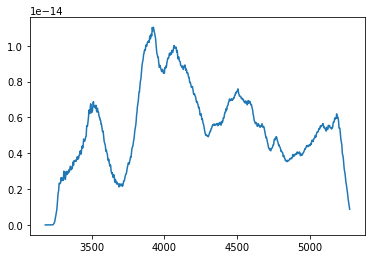

In [ ]:
SN = pd.DataFrame(SN1['SN2007af'][-2][0]['data'])

plt.plot(SN[0].astype('float'), SN[1].astype('float'))

A useful information here is the redshift of these spectra (just so it is clear, all 50 spectra in this dataset are from the same kilonova, but at different ages), which is z = 0.0097. You will soon understand how I apply or correct the redshifts in the spectra.

Now it is a good moment to say that, sadly, the "superfit" templates do not bring us information about the redshift on each spectrum. Therefore I don't know if the spectra from the supernovae are all set to the rest wavelength (redshift 0) or not. Before I continue, it is useful to invastigate the units used for the measurements of the supernovae spectra and the kilonovae spectra.

#### Flux units and redshift

First of all, these spectra are curves of flux vs wavelength. In both supernovae and kilonovae data, the wavelength is measured in Angstroms, so that should no present us any problem. The problem might be in the units used to measure the flux, some observational studies call flux, what we would normally call flux$\times$frequency, while others use only the normal definition of flux. For the kilonovae data, it is not difficult to find the units of the spectra.

On the page of [The Open Kilonova Catalog](https://kilonova.space/), by clicking in the GW170817 event, you are redirected to a page showing all data related to that event, including interactive graphs. By passing the mouse on top of the spectra curves, a lot of information jumps into the screen, and among them, the flux unit

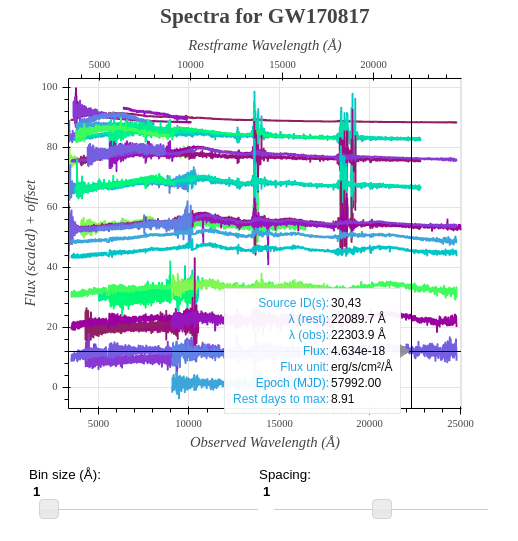

Ok, so the flux is in units of (ergs/s/cm²/Angstroms), which means that the Open Kilonova Datalog is using the units of flux $\times$ frequency.

For the superfit, we go to the original paper ([Gemini Spectroscopy of Supernovae from the Supernova Legacy Survey: Improving High-Redshift Supernova Selection and Classification](https://iopscience.iop.org/article/10.1086/497119/meta)) where the authors assemble the dataset. There, you may find some example plots of the spectra in the dataset. So I got the same file shown as example in the paper and plotted the curve for a better comparision between the paper and the one inside the dataset.

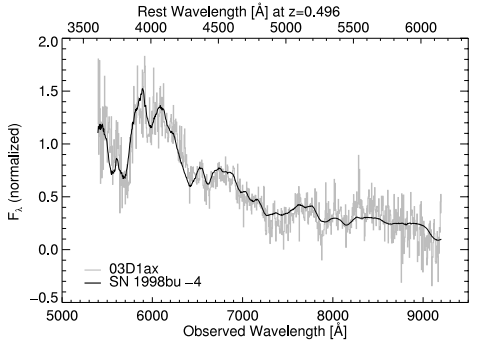

In [ ]:
# Finding the SN1998bu 4 data to plot

example = templist[0][98]

Text(0.5, 1.0, 'Ia/sn1998bu.m04.dat')

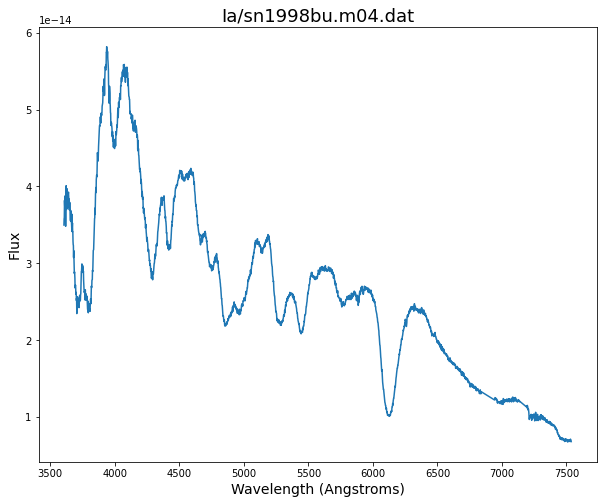

In [ ]:
data2 = np.loadtxt(path + example, dtype='object')

plt.figure(figsize=(10,8))
plt.plot(data2[:,0].astype('float'), data2[:,1].astype('float'))
plt.xlabel('Wavelength (Angstroms)', fontsize = 14)
plt.ylabel('Flux', fontsize = 14)
plt.title(f'{example}', fontsize = 18)

Two things can be noted here:


*   First: The x-axis correspond to the same x-axis shown in the top of the paper
*   Second: The overrall shape of the curves seems alike, but there are clearly some differences in the height of the peaks and valleys between them

For the first problem, the spectrum shown in the paper has two x-axis, the top one is at the rest wavelength, that is, it is corrected for 0 redshift, while the bottom one is the observed wavelength. The one I plotted fits the top x-axis. So the conclusion is that the spectra in the "superfit" dataset are already corrected for 0 redshift (not actually 0, but something like 10⁻⁹). To evaluate this, we can apply the redshift equation to the spectrum by multiplying it by (1+z) and check if it matches the bottom x-axis

$$ \lambda_{obs} = (1+z)\lambda_{real}. $$

Now for the second problem. The fact that the overrall shape of the curves look alike but the more you move in the x-axis the more they look different, suggests that the plot in the paper is actually in frequency $\times$ flux units.

I than, tested applying the redshift, dividing the flux by the wavelength and limiting the plot to 9000 angstroms, and see if it looks better.



(0.0, 2.5e-17)

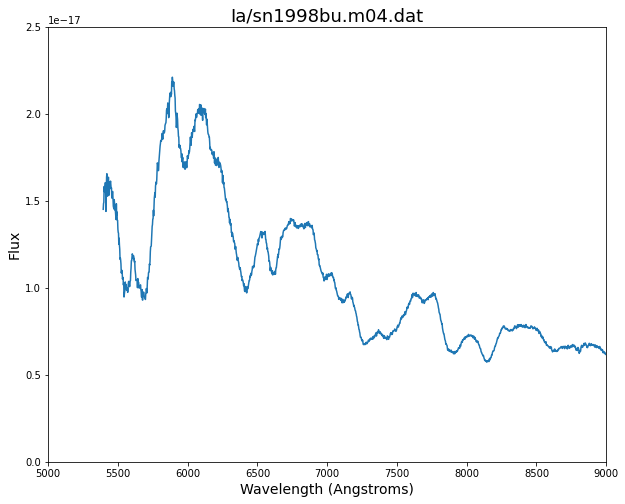

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data2[:,0].astype('float')*(1+0.496),
         (data2[:,1].astype('float')*(1/data2[:,0].astype('float')*(1+0.496))))
plt.xlabel('Wavelength (Angstroms)', fontsize = 14)
plt.ylabel('Flux', fontsize = 14)
plt.title(f'{example}', fontsize = 18)
plt.xlim(5000, 9000)
plt.ylim(0,2.5e-17)

That is way closer to the curve shown in the paper. Therefore, two conclusions are drawn from this:

* First: The flux units on the paper are actually flux $\times$ frequency, while the dataset is given only in standard units of flux (ergs/s/cm²)
* Second: The spectra in the dataset are set to 0 redshift

### Let's continue doing it

With the flux units known for each spectrum, I resume the construction of this dataset.

I continue to build to functions that will be used later. The first, called **interpol**, will be responsible for interpolating all spectra, so all of them have the same number of points and the same range of variation in wavelength. The second, called **normalize** just normalizes the spectrum. We will also need to smooth the curves (specially the ones from the kilonova dataset, that have not been previously smoothed by the creators of the dataset), but this is already achieved by the **medfilt** function from *scipy.signal*.

In order to build the **interpol** function, I need to set the range of wavelength, to do so, I used a loop to go through all files from the supernovae and kilonovae dataset and grab the last value of wavelength each of them had. Then, I plotted them in a histogram to verify the maximum values of wavelength found in the spectra

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


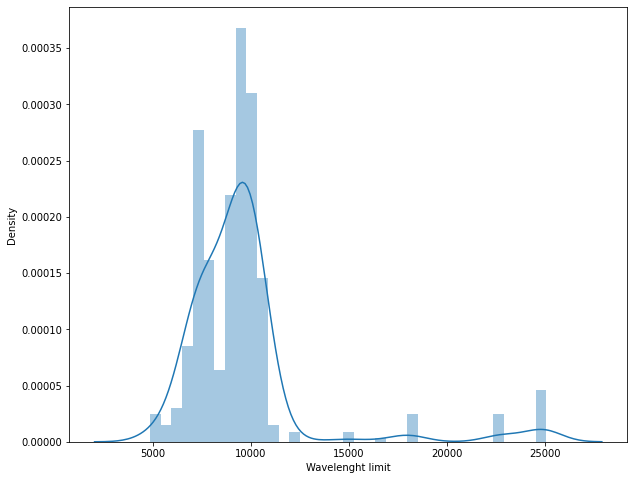

In [ ]:
waves = []

for l in range(6):
  if l == 0:
    for m in range(len(kilo['GW170817'][-3])):
      kilo_1 = pd.DataFrame(kilo['GW170817'][-3][m]['data'])
      kilo_1 = np.array(kilo_1.astype('float'))
      waves.append(kilo_1[-1,0])
  elif l == 1:
    for i in range(len(templist[0])):
      data2 = np.loadtxt(path + templist[0][i], dtype='object')
      for j in range(len(data2)):
        if 'D' in data2[j,1]:
          data2[j,1] = data2[j,1].replace('D','e')
        if 'D' in data2[j,0]:
          data2[j,0] = data2[j,0].replace('D','e')
      data2 = data2.astype('float')
      waves.append(data2[-1,0])
  elif l == 2:
    for m in range(len(SN1['SN2007af'][-2])):
      SN1_1 = pd.DataFrame(SN1['SN2007af'][-2][m]['data'])
      SN1_1 = np.array(SN1_1.astype('float'))
      waves.append(SN1_1[-1,0])
  elif l == 3:
    for m in range(len(SN2['SN2011fe'][-2])):
      SN2_1 = pd.DataFrame(SN2['SN2011fe'][-2][m]['data'])
      SN2_1 = np.array(SN2_1.astype('float'))
      waves.append(SN2_1[-1,0])
  elif l == 4:
    for m in range(len(SN3['SN2004et'][-2])):
      SN3_1 = pd.DataFrame(SN3['SN2004et'][-2][m]['data'])
      SN3_1 = np.array(SN3_1.astype('float'))
      waves.append(SN3_1[-1,0])
  elif l == 5:
    for m in range(len(SN4['SN2015bn'][-2])):
      SN4_1 = pd.DataFrame(SN4['SN2015bn'][-2][m]['data'])
      SN4_1 = np.array(SN4_1.astype('float'))
      waves.append(SN4_1[-1,0])

plt.figure(figsize=(10,8))
sns.distplot(waves, axlabel='Wavelenght limit')

Given that the maximum value of wavelength found here is 25000 Angstroms, I'll construct my interpolation function ranging from 1000 to 27000 Angstroms.

In [ ]:
# Interpolation

def interpol(x, y):
  x_init = np.linspace(1000, 27000, 30000)
  x_1 = np.linspace(1000, x[0], 1000)[:-1]
  x_2 = np.linspace(x[-1], 27000, 1000)[1:]
  x_all = np.concatenate((x_1, x, x_2))
  y_zeros = np.copy(x_all)*0
  y_zeros[len(x_1+1):len(x_1+1)+len(x)] = y
  y_inter = np.interp(x_init, x_all, y_zeros)
  return x_init, y_inter

# Normalization

def normalize(x):
  x_norm = (x - np.min(x)) / (np.max(x)-np.min(x))
  return x_norm

Now I finally build the whole dataset. The logic goes as follow:

I'll create a empty dataframe with 30000 entries. Then, I'll make a loop to go through the kilo dataframe getting all 50 spectra inside it. For each spectrum, I transform it into an array, than smooth it and normalize it. The smoothing window will be 71 for the kilonovae spectra. After smoothing and normalizing, I'll pass it trough the **interpol** function and save the interpoled spectrum into the empty dataframe I created in the beginnig. The name of the collumn where it will be saved is the type of the event ("KN" for kilonova), followed by the name of the event and the iteration number to prevent two collumns from having the same name.

After that, the loop proceeds to the supernovae files and do the same thing, except for the smoothing window, that will be set to 31

In [ ]:
pi = \
    3.1415926535897932384626433832795028841971693993751058209749445923078164

e = \
    2.7182818284590452353602874713526624977572470936999595749669676277240766

radians = \
    206264.80624709635515647335733077861319665970087963155757697687790033025
#arc-second

mpc = 3.08568025E19
#kilo-meter

c = 299792.458
#kilo-meter/second

c2 = 89875517873.68175
#kilo-meter*kilo-meter/second/second

g_newton = 6.67384E-11
#meter*meter*meter/kilo-gram/second/second

solar_mass = 1.98892E30
#kilograms

h = 0.7
H0 = h * 100.0 #km/sec/mpc
H0_sec = H0/mpc # hubble constant in sec


def ang_dis(z_init, z_final, omega0_m, omega0_k, omega0_l,w=-1, unit='km', model='wcdm',aux1=0.0):
    """
    Compute the angular diameter distance

    Input:
     - z_init  float : initial red-shift
     - z_final float : final red-shift
    Output:
     - angular diameter distance in megaparsec
    """
    #megaparsec = 3.08568025E19 #[kilo-meters]
    #H0 = 100.0 * self.__h / 3.08568025E19
    #c_light = 299792.458/megaparsec
    #return c_light/H0/(1.0 + z_final)*self.int_flat(z_init, z_final)
    return (1.0/(1.0 + z_final))*com_dist(z_init, z_final, omega0_m, omega0_k, omega0_l,w=w, unit=unit, model=model,aux1=aux1) 

def com_dist(z_init, z_final, omega0_m, omega0_k, omega0_l,w=-1,unit='km', model='wcdm',aux1=0.0, omega0_g=False):
    """
    Compute the comoving distance

    Input:
     - z_init  float : initial red-shift
     - z_final float : final red-shift
    Output:
     - FIX ME

    args=


    """
    c1 = c/H0_sec
    if unit=='m' or unit =='meters':
       c1=c1*10E3
    if unit=='cm' or unit =='centimeters':
       c1=c1*10E5

    return c1*int_fflat(z_init, z_final, omega0_m, omega0_k, omega0_l, w=w, model=model,aux1=aux1, omega0_g=omega0_g) 




def lum_dist(z_init, z_final, omega0_m, omega0_k, omega0_l,w=-1,unit='km', model='wcdm',**kwargs):
    """
    Compute the luminosity distance

    Input:
     - z_init  float : initial red-shift
     - z_final float : final red-shift
    Output:
     - FIX ME
    """
    one_plus_z_final=(1.0 + z_final)
    return (one_plus_z_final)*com_dist(z_init, z_final, omega0_m, omega0_k, omega0_l,w=w,unit=unit, model=model,**kwargs)

def int_fflat(z_init, z_final, omega0_m, omega0_k, omega0_l, w=-1,model='wcdm', aux1=0.0,omega0_g=False):
    """
    Compute the eq (3.4) in my msc thesis

    Input:
     - z_init  float : initial red-shift
     - z_final float : final red-shift

    Output:
     - 'I'
    """
    
    out = integrate.quad(fadm_hubble_param_inv, z_init, z_final, \
                args=(omega0_m, omega0_k, omega0_l,w,model,aux1,omega0_g))
    #print out
    if omega0_k <= 10E-8:
        return out[0]
    else:
        print('ERROR in int_flat: you showld use a flat cosmology')
        return 0.0   

def fadm_hubble_param_inv(z_in, omega0_m, omega0_k, omega0_l=0.7, w=-1.0, model='wcdm', aux1=0.0,omega0_g=False,**kwargs):
    """
    omega_g=2.469E-5
    """
    if omega0_g ==True:# kwargs.keys():
        h=cosmo.h # hubble reduced const
        N_eff=3.04 # Komatsu et al. 2011
        omega0_g=((2.469E-5)/(h*h))*(1+0.2271*N_eff) 
    else:
        omega0_g=0.0
    one_plus_z = 1.0 + z_in

    if model=='lambdacdm':
        out = sqrt(omega0_m*one_plus_z**3.0 + omega0_k*one_plus_z**2.0 + \
               omega0_l )
    elif model=='CLP':
        wa=aux1
        omega0_l=1-omega0_m - omega0_g
        if type(z_in)!=type(1.0):
           z_in=np.array(z_in).astype(float)
           one_plus_z=np.array(one_plus_z).astype(float) 
        arg_exp=(-3*wa*z_in)/one_plus_z
        f_z=one_plus_z**(3*(1+w+wa))*np.exp(arg_exp)
        out = sqrt(omega0_g*one_plus_z**4.0 + omega0_m*one_plus_z**3.0 + omega0_l*f_z)
    elif model=='IDE':
        omega0_l=1-omega0_m - omega0_g
        delta=aux1
        fz=one_plus_z**(3*(1+w))
        f2z=((delta*fz)+(3*w*one_plus_z**(3-delta))) /(delta+3*w)
        out = sqrt(omega0_g*one_plus_z**4.0 + omega0_m*f2z + omega0_l*f_z)
    else:
        omega0_l=1.0-abs(omega0_m - omega0_g)
        #print "cosmo params"
        #print omega0_l
        #print omega0_m
        #print omega0_g
        #print one_plus_z
        #print w
        #print "fim cosmo"
        out = sqrt(omega0_g*one_plus_z**4.0 + omega0_m*one_plus_z**3.0 + omega0_l*one_plus_z**(3*(1+w)))
       
 
    return 1.0/out

In [ ]:
def refshift_tempflux2(wavelen,flux,zin,zout):
    """
    WARNING: FLUX DENSITY MUST BE IN units of wavelenght
   
    """
    zadd=zout-zin
    zeff=zin+zadd+(zin*zadd)
    #print "this are the wavelen axis before and after the redshift"
    #print wavelen#[:10]
    for i in range(0,len(wavelen)):
        wavelen[i]+=zadd*wavelen[i]
    #print wavelen#[:10]

    flux=np.array(flux).astype('double')
    DLeff=lum_dist(0, z_final=zeff, omega0_m=0.3, omega0_k=0, omega0_l=0.7,w=-1,unit='km', model='lambdacdm')
    DLeff=DLeff*10E5

    DLin=lum_dist(0, z_final=zin, omega0_m=0.3, omega0_k=0, omega0_l=0.7,w=-1,unit='km', model='lambdacdm')
    DLin=DLin*10E5
    #print "the cosmological distances"
    #print DLin
    #print zin
    #print DLeff
    #print zeff
    DLratio_inv= DLin/DLeff
    z_plus_one_eff=1.0+zeff
    z_plus_one_in=1.0+zin
    flux=(z_plus_one_in/z_plus_one_eff)*flux # https://arxiv.org/pdf/astro-ph/9905116.pdf
    #print "the k correction was    "
    #print DLratio_inv
    flux=flux*(DLratio_inv**2)
    return wavelen,flux,zeff

def lum_dist(z_init, z_final, omega0_m, omega0_k, omega0_l,w=-1,unit='km', model='wcdm',**kwargs):
    """
    Compute the luminosity distance

    Input:
     - z_init  float : initial red-shift
     - z_final float : final red-shift
    Output:
     - FIX ME
    """
    one_plus_z_final=(1.0 + z_final)
    return (one_plus_z_final)*com_dist(z_init, z_final, omega0_m, omega0_k, omega0_l,w=w,unit=unit, model=model,**kwargs)

In [ ]:
# Salvar o comprimento de onda original antes do interpolado

filename = 'dataset_supernovas_teste03'
hf = h5py.File(filename+".h5", 'w')
# Loop to go first into the kilonovae dataset and later the supernovae dataset
for l in range(7):
  if l == 0:
    # Loop to go through all spectra files in the kilo['GW170817'] dataframe
    for m in range(len(kilo['GW170817'][-3])):
      kilo_1 = pd.DataFrame(kilo['GW170817'][-3][m]['data'])
      kilo_1 = np.array(kilo_1.astype('float'))
      kilo_1_smooth = medfilt(kilo_1[:,1], 51)
      kilo_norm = normalize(kilo_1_smooth)
      x, y = interpol(kilo_1[:,0], kilo_1[:,1])
      x2, y_norm = interpol(kilo_1[:,0], kilo_norm)
      x3, y_smooth = interpol(kilo_1[:,0], kilo_1_smooth)

      p = np.random.uniform(0.0097,1,5)
      for i in range(len(p)):
        wavelenght_redshift, red_y, zeff = refshift_tempflux2(x, y, 0.0097, p[i])
        x_redshft, y_redshft = interpol(np.array(wavelenght_redshift), y)
        wavelenght_redshift_n, red_y, zeff = refshift_tempflux2(x, y_norm, 0.0097, p[i])
        x_redshft_n, y_redshft_n = interpol(np.array(wavelenght_redshift), y_norm)
        hf.create_dataset(f'wavelen_z_{l}{m}{i}', data = x_redshft)
        hf.create_dataset(f'flux_erg_s_a_z_{l}{m}{i}', data = y_redshft)
        hf.create_dataset(f'z_{l}{m}{i}', data = p[i])
        hf.create_dataset(f'flux_erg_s_a_z_norm_smooth_{l}{m}{i}', data = y_redshft_n)
      if m == 0:
        hf.create_dataset(f'flux_erg_s_a_pure_{l}{m}', data= y)
      else:
        hf.create_dataset(f'wavelen_pure_{l}{m}', data= x)
        hf.create_dataset(f'flux_erg_s_a_z_median_{l}{m}', data = y_smooth)
        hf.create_dataset(f'median_size_{l}{m}', data = 51)
        hf.create_dataset(f'flux_median_normalized_{l}{m}', data = y_norm)
        hf.create_dataset(f'time_{l}{m}', data = 'Unkown')
        hf.create_dataset(f'class_{l}{m}', data = 'Kilonova')
        hf.create_dataset(f'_id_{l}{m}', data = 'GW170817')
        hf.create_dataset(f'ra_{l}{m}', data = kilo['GW170817']['ra'][0]['value'])
        hf.create_dataset(f'dec_{l}{m}', data = kilo['GW170817']['dec'][0]['value'])
        hf.create_dataset(f'data_source_{l}{m}', data = 'Open Kilonova Dataset')
  # Proceed with the loop through the supernova files from Open Supernova Dataset
  elif l == 1:
    # Loop to go through all spectra files in the SN1['SN2007af'] dataframe
    for m in range(len(SN1['SN2007af'][-2])):
      SN1_1 = pd.DataFrame(SN1['SN2007af'][-2][m]['data'])
      SN1_1 = np.array(SN1_1.astype('float'))
      SN1_1_smooth = medfilt(SN1_1[:,1], 31)
      SN1_norm = normalize(SN1_1_smooth)
      x, y = interpol(SN1_1[:,0], SN1_1[:,1])
      x2, y_norm = interpol(SN1_1[:,0], SN1_norm)
      x3, y_smooth = interpol(SN1_1[:,0], SN1_1_smooth)

      p = np.random.uniform(0.005464,1,5)
      for i in range(len(p)):
        wavelenght_redshift, red_y, zeff = refshift_tempflux2(x, y, 0.005464, p[i])
        x_redshft, y_redshft = interpol(np.array(wavelenght_redshift), y)
        wavelenght_redshift_n, red_y, zeff = refshift_tempflux2(x, y_norm, 0.005464, p[i])
        x_redshft_n, y_redshft_n = interpol(np.array(wavelenght_redshift), y_norm)
        hf.create_dataset(f'wavelen_z_{l}{m}{i}', data = x_redshft)
        hf.create_dataset(f'flux_erg_s_a_z_{l}{m}{i}', data = y_redshft)
        hf.create_dataset(f'z_{l}{m}{i}', data = p[i])
        hf.create_dataset(f'flux_erg_s_a_z_norm_smooth_{l}{m}{i}', data = y_redshft_n)

      #hf.create_dataset(f'flux_erg_s_a_pure_{l}{m}', data= y)
      hf.create_dataset(f'wavelen_pure_{l}{m}', data= x)
      hf.create_dataset(f'flux_erg_s_a_z_median_{l}{m}', data = y_smooth)
      hf.create_dataset(f'median_size_{l}{m}', data = 31)
      hf.create_dataset(f'flux_median_normalized_{l}{m}', data = y_norm)
      hf.create_dataset(f'time_{l}{m}', data = 'Unkown')
      hf.create_dataset(f'class_{l}{m}', data = 'Supernova type Ia')
      hf.create_dataset(f'_id_{l}{m}', data = 'SN2007af')
      hf.create_dataset(f'ra_{l}{m}', data = SN1['SN2007af']['ra'][0]['value'])
      hf.create_dataset(f'dec_{l}{m}', data = SN1['SN2007af']['dec'][0]['value'])
      hf.create_dataset(f'data_source_{l}{m}', data = 'Open Supernova Dataset')

  elif l == 2:
    # Loop to go through all spectra files in the SN2['SN2011fe'] dataframe
    for m in range(len(SN2['SN2011fe'][-2])):
      SN2_1 = pd.DataFrame(SN2['SN2011fe'][-2][m]['data'])
      SN2_1 = np.array(SN2_1.astype('float'))
      SN2_1_smooth = medfilt(SN2_1[:,1], 31)
      SN2_norm = normalize(SN2_1_smooth)
      x, y = interpol(SN2_1[:,0], SN2_1[:,1])
      x2, y_norm = interpol(SN2_1[:,0], SN2_norm)
      x3, y_smooth = interpol(SN2_1[:,0], SN2_1_smooth)

      p = np.random.uniform(0.000804,1,5)
      for i in range(len(p)):
        wavelenght_redshift, red_y, zeff = refshift_tempflux2(x, y, 0.000804, p[i])
        x_redshft, y_redshft = interpol(np.array(wavelenght_redshift), y)
        wavelenght_redshift_n, red_y, zeff = refshift_tempflux2(x, y_norm, 0.000804, p[i])
        x_redshft_n, y_redshft_n = interpol(np.array(wavelenght_redshift), y_norm)
        hf.create_dataset(f'wavelen_z_{l}{m}{i}', data = x_redshft)
        hf.create_dataset(f'flux_erg_s_a_z_{l}{m}{i}', data = y_redshft)
        hf.create_dataset(f'z_{l}{m}{i}', data = p[i])
        hf.create_dataset(f'flux_erg_s_a_z_norm_smooth_{l}{m}{i}', data = y_redshft_n)

      #hf.create_dataset(f'flux_erg_s_a_pure_{l}{m}', data= y)
      hf.create_dataset(f'wavelen_pure_{l}{m}', data= x)
      hf.create_dataset(f'flux_erg_s_a_z_median_{l}{m}', data = y_smooth)
      hf.create_dataset(f'median_size_{l}{m}', data = 31)
      hf.create_dataset(f'flux_median_normalized_{l}{m}', data = y_norm)
      hf.create_dataset(f'time_{l}{m}', data = 'Unkown')
      hf.create_dataset(f'class_{l}{m}', data = 'Supernova type Ia')
      hf.create_dataset(f'_id_{l}{m}', data = 'SN2011fe')
      hf.create_dataset(f'ra_{l}{m}', data = SN2['SN2011fe']['ra'][0]['value'])
      hf.create_dataset(f'dec_{l}{m}', data = SN2['SN2011fe']['dec'][0]['value'])
      hf.create_dataset(f'data_source_{l}{m}', data = 'Open Supernova Dataset')
  elif l == 3:
    # Loop to go through all spectra files in the SN3['SN2004et'] dataframe
    for m in range(len(SN3['SN2004et'][-2])):
      SN3_1 = pd.DataFrame(SN3['SN2004et'][-2][m]['data'])
      SN3_1 = np.array(SN3_1.astype('float'))
      SN3_1_smooth = medfilt(SN3_1[:,1], 31)
      SN3_norm = normalize(SN3_1_smooth)
      x, y = interpol(SN3_1[:,0], SN3_1[:,1])
      x2, y_norm = interpol(SN3_1[:,0], SN3_norm)
      x3, y_smooth = interpol(SN3_1[:,0], SN3_1_smooth)

      p = np.random.uniform(0.000909,1,5)
      for i in range(len(p)):
        wavelenght_redshift, red_y, zeff = refshift_tempflux2(x, y, 0.000909, p[i])
        x_redshft, y_redshft = interpol(np.array(wavelenght_redshift), y)
        wavelenght_redshift_n, red_y, zeff = refshift_tempflux2(x, y_norm, 0.000909, p[i])
        x_redshft_n, y_redshft_n = interpol(np.array(wavelenght_redshift), y_norm)
        hf.create_dataset(f'wavelen_z_{l}{m}{i}', data = x_redshft)
        hf.create_dataset(f'flux_erg_s_a_z_{l}{m}{i}', data = y_redshft)
        hf.create_dataset(f'z_{l}{m}{i}', data = p[i])
        hf.create_dataset(f'flux_erg_s_a_z_norm_smooth_{l}{m}{i}', data = y_redshft_n)

      #hf.create_dataset(f'flux_erg_s_a_pure_{l}{m}', data= y)
      hf.create_dataset(f'wavelen_pure_{l}{m}', data= x)
      hf.create_dataset(f'flux_erg_s_a_z_median_{l}{m}', data = y_smooth)
      hf.create_dataset(f'median_size_{l}{m}', data = 31)
      hf.create_dataset(f'flux_median_normalized_{l}{m}', data = y_norm)
      hf.create_dataset(f'time_{l}{m}', data = 'Unkown')
      hf.create_dataset(f'class_{l}{m}', data = 'Supernova type II')
      hf.create_dataset(f'_id_{l}{m}', data = 'SN2015bn')
      hf.create_dataset(f'ra_{l}{m}', data = SN3['SN2004et']['ra'][0]['value'])
      hf.create_dataset(f'dec_{l}{m}', data = SN3['SN2004et']['dec'][0]['value'])
      hf.create_dataset(f'data_source_{l}{m}', data = 'Open Supernova Dataset')
  elif l == 4:
    # Loop to go through all spectra files in the SN4['SN2015bn'] dataframe
    for m in range(len(SN4['SN2015bn'][-2])):
      SN4_1 = pd.DataFrame(SN4['SN2015bn'][-2][m]['data'])
      SN4_1 = np.array(SN4_1.astype('float'))
      SN4_1_smooth = medfilt(SN4_1[:,1], 31)
      SN4_norm = normalize(SN4_1_smooth)
      x, y = interpol(SN4_1[:,0], SN4_1[:,1])
      wavelenght_redshift, red_y, zeff = refshift_tempflux2(x, y, 0.1136, 1e-9)
      x, y_new = interpol(np.array(wavelenght_redshift), y)
      x2, y_norm = interpol(SN4_1[:,0], SN4_norm)
      x3, y_smooth = interpol(SN4_1[:,0], SN4_1_smooth)

      p = np.random.uniform(0.1136,1,5)
      for i in range(len(p)):
        wavelenght_redshift, red_y, zeff = refshift_tempflux2(x, y, 0.1136, p[i])
        x_redshft, y_redshft = interpol(np.array(wavelenght_redshift), y)
        wavelenght_redshift_n, red_y, zeff = refshift_tempflux2(x, y_norm, 0.1136, p[i])
        x_redshft_n, y_redshft_n = interpol(np.array(wavelenght_redshift), y_norm)
        hf.create_dataset(f'wavelen_z_{l}{m}{i}', data = x_redshft)
        hf.create_dataset(f'flux_erg_s_a_z_{l}{m}{i}', data = y_redshft)
        hf.create_dataset(f'z_{l}{m}{i}', data = p[i])
        hf.create_dataset(f'flux_erg_s_a_z_norm_smooth_{l}{m}{i}', data = y_redshft_n)

      #hf.create_dataset(f'flux_erg_s_a_pure_{l}{m}', data= y_new)
      hf.create_dataset(f'wavelen_pure_{l}{m}', data= x)
      hf.create_dataset(f'flux_erg_s_a_z_median_{l}{m}', data = y_smooth)
      hf.create_dataset(f'median_size_{l}{m}', data = 31)
      hf.create_dataset(f'flux_median_normalized_{l}{m}', data = y_norm)
      hf.create_dataset(f'time_{l}{m}', data = 'Unkown')
      hf.create_dataset(f'class_{l}{m}', data = 'Supernova type Ic')
      hf.create_dataset(f'_id_{l}{m}', data = 'SN2015bn')
      hf.create_dataset(f'ra_{l}{m}', data = SN4['SN2015bn']['ra'][0]['value'])
      hf.create_dataset(f'dec_{l}{m}', data = SN4['SN2015bn']['dec'][0]['value'])
      hf.create_dataset(f'data_source_{l}{m}', data = 'Open Supernova Dataset')
  # Now the loop goes to the supernovae dataset
  elif l == 5:
    # Loop to go through all spectra files in templist
    for i in range(len(templist[0])):
      data2 = np.loadtxt(path + templist[0][i], dtype='object')
      # Some spectra have mispelling problems, instead of being written as 1e-17 (or something like it)
      # they are written as 1D-17????
      # This part is to look for entries of values with this problem and correct them to
      # "e" instead of "D"
      for j in range(len(data2)):
        if 'D' in data2[j,1]:
          data2[j,1] = data2[j,1].replace('D','e')
        if 'D' in data2[j,0]:
          data2[j,0] = data2[j,0].replace('D','e')
      data2 = data2.astype('float')
      data2_smooth = medfilt(data2[:,1]/data2[:,0], 31)
      data2_norm = normalize(data2_smooth)
      x, y = interpol(data2[:,0], data2[:,1])
      x2, y_norm = interpol(data2[:,0], data2_norm)
      x3, y_smooth = interpol(data2[:,0], data2_smooth)

      p = np.random.uniform(0,1,5)
      for j in range(len(p)):
        wavelenght_redshift, red_y, zeff = refshift_tempflux2(x, y, 1e-9, p[j])
        x_redshft, y_redshft = interpol(np.array(wavelenght_redshift), y)
        wavelenght_redshift_n, red_y, zeff = refshift_tempflux2(x, y_norm, 1e-9, p[j])
        x_redshft_n, y_redshft_n = interpol(np.array(wavelenght_redshift), y_norm)
        hf.create_dataset(f'wavelen_z_{l}{i}{j}', data = x_redshft)
        hf.create_dataset(f'flux_erg_s_a_z_{l}{i}{j}', data = y_redshft)
        hf.create_dataset(f'z_{l}{i}{j}', data = p[j])
        hf.create_dataset(f'flux_erg_s_a_z_norm_smooth_{l}{i}{j}', data = y_redshft_n)

      #hf.create_dataset(f'flux_erg_s_a_pure_{l}{i}', data= y)
      hf.create_dataset(f'wavelen_pure_{l}{i}', data= x)
      hf.create_dataset(f'flux_erg_s_a_z_median_{l}{i}', data = y_smooth)
      hf.create_dataset(f'median_size_{l}{i}', data = 31)
      hf.create_dataset(f'flux_median_normalized_{l}{i}', data = y_norm)
      hf.create_dataset(f'time_{l}{i}', data = 'Unkown')
      hf.create_dataset(f'class_{l}{i}', data = f'Supernova type {templist[0][i][:2]}')
      hf.create_dataset(f'_id_{l}{i}', data = f'{templist[0][i][3:10]}')
      hf.create_dataset(f'ra_{l}{i}', data = 'Unkown')
      hf.create_dataset(f'dec_{l}{i}', data = 'Unkown')
      hf.create_dataset(f'data_source_{l}{i}', data = 'Superfit')
#DAQUI PRA BAIXO TA SÓ O CAOS PQ TO MEXENDO COM OS DADOS DO SNID
  elif l == 7:
    for i in range(len(spectra)):
      df = pd.read_csv(path + '/' + spectra[i], header = None, sep = '   ')
      for j in range(len(df.columns)):
        if j == 0:
          hf.create_dataset(f'wavelen_pure_{l}{i}', data = df[0].drop(0, axis = 0))
        else:
          hf.create_dataset(f'flux_erg_s_a_z_median')
      #data2 = data2.astype('float')
      #data2_smooth = medfilt(df[j]/data2[:,0], 31)
      #data2_norm = normalize(data2_smooth)
      #x, y = interpol(data2[:,0], data2[:,1])
      #x2, y_norm = interpol(data2[:,0], data2_norm)
      #x3, y_smooth = interpol(data2[:,0], data2_smooth)

      p = np.random.uniform(0,1,5)
      for j in range(len(p)):
        wavelenght_redshift, red_y, zeff = refshift_tempflux2(x, y, 1e-9, p[j])
        x_redshft, y_redshft = interpol(np.array(wavelenght_redshift), y)
        wavelenght_redshift_n, red_y, zeff = refshift_tempflux2(x, y_norm, 1e-9, p[j])
        x_redshft_n, y_redshft_n = interpol(np.array(wavelenght_redshift), y_norm)
        hf.create_dataset(f'wavelen_z_{l}{i}{j}', data = x_redshft)
        hf.create_dataset(f'flux_erg_s_a_z_{l}{i}{j}', data = y_redshft)
        hf.create_dataset(f'z_{l}{i}{j}', data = p[j])
        hf.create_dataset(f'flux_erg_s_a_z_norm_smooth_{l}{i}{j}', data = y_redshft_n)

      #hf.create_dataset(f'flux_erg_s_a_pure_{l}{i}', data= y)
      hf.create_dataset(f'wavelen_pure_{l}{i}', data= x)
      hf.create_dataset(f'flux_erg_s_a_z_median_{l}{i}', data = y_smooth)
      hf.create_dataset(f'median_size_{l}{i}', data = 31)
      hf.create_dataset(f'flux_median_normalized_{l}{i}', data = y_norm)
      hf.create_dataset(f'time_{l}{i}', data = 'Unkown')
      hf.create_dataset(f'class_{l}{i}', data = f'Supernova type {spectra[0][i][:2]}')
      hf.create_dataset(f'_id_{l}{i}', data = f'{spectra[i][:-4]}')
      hf.create_dataset(f'ra_{l}{i}', data = 'Unkown')
      hf.create_dataset(f'dec_{l}{i}', data = 'Unkown')
      hf.create_dataset(f'data_source_{l}{i}', data = 'SNID')
hf.close()

In [ ]:
hf.close()

Take a look at the final dataset! 378 collumns, each one with 30000 values of spectrum (normally, the first and final values are 0s since the interpolation range was wider than the actual range of wavelength measurements)

In [ ]:
data

,Wavelength,KN_GW170817_0,KN_GW170817_1,KN_GW170817_2,KN_GW170817_3,KN_GW170817_4,KN_GW170817_5,KN_GW170817_6,KN_GW170817_7,KN_GW170817_8,KN_GW170817_9,KN_GW170817_10,KN_GW170817_11,KN_GW170817_12,KN_GW170817_13,KN_GW170817_14,KN_GW170817_15,KN_GW170817_16,KN_GW170817_17,KN_GW170817_18,KN_GW170817_19,KN_GW170817_20,KN_GW170817_21,KN_GW170817_22,KN_GW170817_23,KN_GW170817_24,KN_GW170817_25,KN_GW170817_26,KN_GW170817_27,KN_GW170817_28,KN_GW170817_29,KN_GW170817_30,KN_GW170817_31,KN_GW170817_32,KN_GW170817_33,KN_GW170817_34,KN_GW170817_35,KN_GW170817_36,KN_GW170817_37,KN_GW170817_38,...,II_sn1999_287,II_sn1999_288,II_sn2004_289,II_sn2004_290,II_sn2004_291,II_sn2004_292,II_sn2004_293,II_sn2004_294,II_sn2004_295,II_sn2004_296,II_sn2004_297,II_sn2004_298,II_sn2004_299,II_sn2004_300,II_sn2004_301,II_sn2004_302,II_sn2005_303,II_sn2005_304,II_sn2005_305,II_sn2005_306,II_sn2005_307,II_sn2005_308,II_sn2005_309,II_sn2005_310,II_sn2005_311,II_sn2005_312,II_sn2005_313,II_sn2005_314,II_sn2005_315,II_sn2005_316,II_sn2005_317,II_sn2005_318,II_sn2005_319,II_sn2005_320,II_sn2005_321,II_sn2005_322,II_sn2008_323,II_sn2008_324,II_sn2008_325,II_sn2008_326
0,1000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000.866696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001.733391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1002.600087,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003.466782,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,26996.533218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,26997.399913,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,26998.266609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

Just so I can make sure everything is fine, I plot some of these spectra to verify that they are all normalized, smoothed and interpoled

Text(0, 0.5, 'Flux')

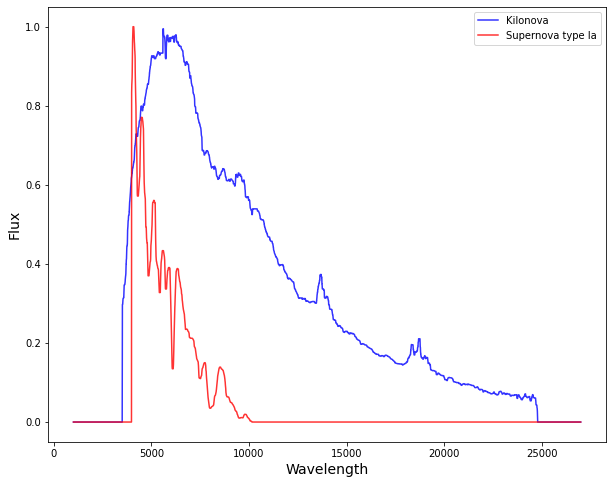

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(data[data.columns[0]], medfilt(data['KN_GW170817_0'], kernel_size = 51), color = 'blue', alpha = 0.8, label = f'Kilonova')
plt.plot(data[data.columns[0]], medfilt(data[data.columns[52]], kernel_size = 71), color = 'red', alpha = 0.8, label = f'Supernova type Ia')
plt.legend()
plt.xlabel('Wavelength', fontsize = 14)
plt.ylabel('Flux', fontsize = 14)

### Saving the dataset

Now, I definetly don't want to loose this work, so I save this final dataset in a .csv file in my drive. It is useful to do it, so you won't have to rebuild the dataset whenever you want to test your network

In [ ]:
data.to_csv('/content/gdrive/My Drive/DeepLearning/dataset_supernovas.csv')

In [ ]:
kilo['GW170817']

alias              [{'value': 'GW170817', 'source': '1,2,4,5,8,9,...
claimedtype        [{'value': 'Kilonova', 'source': '43'}, {'valu...
comovingdist       [{'value': '43', 'derived': True, 'u_value': '...
dec                [{'value': '-23:22:53.35', 'u_value': 'degrees...
discoverdate       [{'value': '2017/08/17', 'derived': True, 'sou...
ebv                [{'value': '0.1053', 'derived': True, 'e_value...
host                         [{'value': 'NGC 4993', 'source': '40'}]
lumdist            [{'value': '43.2', 'derived': True, 'u_value':...
maxabsmag          [{'value': '-16.3', 'derived': True, 'source':...
maxappmag          [{'value': '16.85', 'derived': True, 'source':...
maxband            [{'value': 'z', 'derived': True, 'source': '16...
maxdate            [{'value': '2017/08/18', 'derived': True, 'sou...
maxvisualabsmag    [{'value': '-15.9', 'derived': True, 'source':...
maxvisualappmag    [{'value': '17.28', 'derived': True, 'source':...
maxvisualband      [{'value': 'g',

In [ ]:
kilo['GW170817']['dec'][0]['value']

'-23:22:53.35'

In [ ]:
kilo_test = pd.DataFrame(kilo['GW170817'][-3][0]['data'])

In [ ]:
np.array(kilo_test[0].astype('float'))

array([ 6375. ,  6376.1,  6377.3, ..., 10507. , 10508.2, 10509.3])

In [ ]:
filename = 'dataset_supernovas_teste'

In [ ]:
p = np.random.uniform(0.0097, 1, 5)

wavelenght_redshift_2, red_y, zeff = refshift_tempflux2(np.array(kilo_test[0].astype('float')),
                                                        np.array(kilo_test[1].astype('float')), 0.0097, p[1])

In [ ]:
red_med = medfilt(red_y, kernel_size=21)
y_norm = normalize(red_med)

In [ ]:
hf = h5py.File(filename+".h5", 'w')
hf.create_dataset('flux_erg_s_a_pure', data=np.array(kilo_test[0].astype('float')))
hf.create_dataset('wavelen_pure', data=np.array(kilo_test[1].astype('float')))
hf.create_dataset('flux_erg_s_a_z', data = red_y)
hf.create_dataset('wavelen_z', data = wavelenght_redshift_2)
hf.create_dataset('flux_erg_s_a_z_median', data = red_med)
hf.create_dataset('median_size', data = 21)
hf.create_dataset('flux_median_normalized', data = y_norm)
hf.create_dataset('time', data = 'Unkown')
hf.create_dataset('z', data = p[1])
hf.create_dataset('class', data = 'Kilonova')
hf.create_dataset('_id', data = 'GW170817')
hf.create_dataset('ra', data = kilo['GW170817']['ra'][0]['value'])
hf.create_dataset('dec', data = kilo['GW170817']['dec'][0]['value'])
hf.create_dataset('data_source', data = 'Open Kilonova Dataset')
hf.close()

In [ ]:
hf = h5py.File(filename+".h5", 'w')
hf.create_dataset('flux_erg_s_a_pure', data=data.drop(0)) #fluxes in erg/s * Angstrom at rest frame
hf.create_dataset('wavelen_pure', data=data['Wavelenght']) # in rest frame

hf.create_dataset('flux_erg_s_a_z', data=z_flux)  #fluxes in erg/s * Angstrom at a given redshift, note that fluxes changed when you redshift something  

hf.create_dataset('wavelen_z', data=z_wave) # wavelenght redshifted

hf.create_dataset('flux_erg_s_a_z_median', data=z_flux_median)  #fluxes in erg/s * Angstrom at a given redshift  after your median filter

hf.create_dataset('median_size', data=window_size)  # tamanho do filtro mediano utilizado

hf.create_dataset('flux_median_normalized', data=z_flux_median_norm)  #fluxes  after your median filter and normalized

# se tudo estiver OK o wavelength não mudou desde que vc redshiftou

hf.create_dataset('wavelen_z', data=z_wave) # wavelenght redshifted


hf.create_dataset('time', data=times[k]) # idade em dias
hf.create_dataset('z', data=z_eff) # redshift

hf.create_dataset('class', data=class) # classe  

 hf.create_dataset('_id', data=_id)  # object identification 
# isso e muito importante porque as supernovas as vezes tem múltiplos espectros em dias (idades diferentes). Portanto é importante ter um  identificador para saber se são oriundas do mesmo objeto

hf.create_dataset('ra', data=ra)
   
hf.create_dataset('dec', data=dec)
hf.create_dataset('data_source', data=source_name) # o nome do dataset de origem

# adicione a Magnitude e o mag_err se houver em cada banda abaixo para este spectro neste dia. Se não complete com None
filter_names=['u','g','r','i','z','Y']
for l in range(0,len(filter_names)):
                        hf.create_dataset('mag_'+filter_names[l], data=mags[l], dtype=type(2.0))
                        hf.create_dataset('magerr_'+filter_names[l], data=mags_err[l], dtype=type(2.0))

hf.close()

SyntaxError: ignored

## Bulding and testing the neural network

---

In this second part I'll construct, train and test neural networks to try to achieve my goal of classifying the spectra into supernovae type II, Ia, Ib and Ic, as well as kilonovae.

### Treating the data (Redshift, Noise...)

This initial section will be dedicated to creating the training, validation and testing sets, and also applying the data augmentation procedure. As usual, I start it getting access to my google drive, where I saved my complete dataset

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


Now I import the dataset and turn it into a dataframe (I think pandas already transforms the csv into a dataframe, but honestly I had so many problems throughout this project that I prefer to make sure). For some reason, the column that only enumerates the rows was also saved in the .csv file. It goes by the name "Unnamed: 0". Here, the first step is to delete the collumns containg any "nan" values (I don't think there will be any, but again, I rather make sure), and than deleting the columns "Unnamed: 0" and "Wavelength".

You might be asking why did I delete the "Wavelength" column? The reason is simply because in the neural network architectures that I'll be trying here, this information is useless, however if you want to build different types of neural networks, it might be useful.

In [ ]:
df = pd.read_csv('/content/gdrive/My Drive/DeepLearning/dataset_supernovas.csv')

In [ ]:
df = pd.DataFrame(df)

In [ ]:
df = df.dropna(axis=1)

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'Wavelength'])

Let's take a look

In [ ]:
df

,KN_GW170817_0,KN_GW170817_1,KN_GW170817_2,KN_GW170817_3,KN_GW170817_4,KN_GW170817_5,KN_GW170817_6,KN_GW170817_7,KN_GW170817_8,KN_GW170817_9,KN_GW170817_10,KN_GW170817_11,KN_GW170817_12,KN_GW170817_13,KN_GW170817_14,KN_GW170817_15,KN_GW170817_16,KN_GW170817_17,KN_GW170817_18,KN_GW170817_19,KN_GW170817_20,KN_GW170817_21,KN_GW170817_22,KN_GW170817_23,KN_GW170817_24,KN_GW170817_25,KN_GW170817_26,KN_GW170817_27,KN_GW170817_28,KN_GW170817_29,KN_GW170817_30,KN_GW170817_31,KN_GW170817_32,KN_GW170817_33,KN_GW170817_34,KN_GW170817_35,KN_GW170817_36,KN_GW170817_37,KN_GW170817_38,KN_GW170817_40,...,II_sn1999_287,II_sn1999_288,II_sn2004_289,II_sn2004_290,II_sn2004_291,II_sn2004_292,II_sn2004_293,II_sn2004_294,II_sn2004_295,II_sn2004_296,II_sn2004_297,II_sn2004_298,II_sn2004_299,II_sn2004_300,II_sn2004_301,II_sn2004_302,II_sn2005_303,II_sn2005_304,II_sn2005_305,II_sn2005_306,II_sn2005_307,II_sn2005_308,II_sn2005_309,II_sn2005_310,II_sn2005_311,II_sn2005_312,II_sn2005_313,II_sn2005_314,II_sn2005_315,II_sn2005_316,II_sn2005_317,II_sn2005_318,II_sn2005_319,II_sn2005_320,II_sn2005_321,II_sn2005_322,II_sn2008_323,II_sn2008_324,II_sn2008_325,II_sn2008_326
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

#### Redshifting

I proceed to applying random redshifts at my data, in order to help the neural network generalize everything. For that, I use a function that has 4 inputs, the first is the wavelength, the second is the flux, the third is the current redshift value of the spectrum and the last is the desired redshift. For the supernovae spectra, the current redshift will be set to $z_{in}$ = 10⁻⁹, while the kilonovae spectra will be set to $z_{in}$ = 0.0097. Before building the function, it is useful to estimate a good distribution from where I'll retrieve randomly desired values of redshift.

Sadly, the "superfit" dataset does not say what is the redshift of their spectra. But since I downloaded the full DASH data, one of the repositories actually has a file containing all values of redshift in their dataset. It is a different dataset, the [OzDES dataset](https://www.mso.anu.edu.au/ozdes/index.html) (I did not include the spectra from this dataset because I had to many problems with the formatting they use). Then, I plot a distribution of these redshifts in an attempt to estimate a good redshift distribution.

In [ ]:
# Opening the dataframe containing the information of all spectra in the OzDES dataset
atels = pd.read_csv('/content/gdrive/My Drive/DeepLearning/Astrodash/templates/all_atels.txt', sep = '|')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


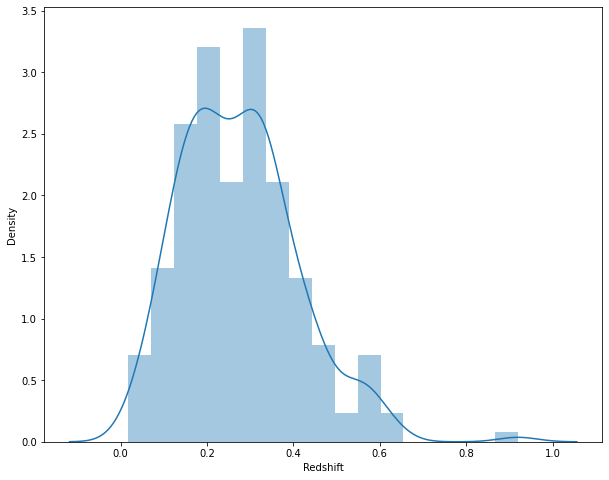

In [ ]:
# Using seaborn to plot a distribution of redshifts
plt.figure(figsize=(10,8))
sns.distplot(atels['Redshift'], kde = True, axlabel = 'Redshift')

A gaussian distribution seems a good estimate, but before proceeding I decided to look for more references of redshift distributions. The original paper of "superfit" ([Gemini Spectroscopy of Supernovae from the Supernova Legacy Survey: Improving High-Redshift Supernova Selection and Classification](https://iopscience.iop.org/article/10.1086/497119/meta)) also shows the distribution of redshifts they have for the spectra (although they don't specify the exact redshift of each spectrum). That distribution is quite different from the OzDES distribtuion of redshifts

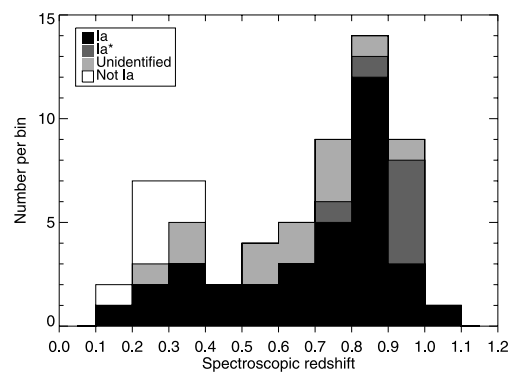

In the end, it appears that depending on the objective of the survey, smaller or bigger redshift supernovas are caught. Therefore, I decided that to generalize well the network, and not favor one specific type of survey, I will assume the distribution from where I'll be choosing random redshifts to be a uniform distribution from 0 to 1.

With this set, I use a function built by Clécio himself to apply the redshift, the whole code cell may be used to do more than just applying redshifts, so I decided to leave it as it is, in case you want to use any other function in your data. But if are just interested in the redshift, the only functions that are relevant are the **com_dist**, **lum_dist** and **refshift_tempflux2**. The later is the one that will be applied to the data, but the first two are required for tha later to work

In [ ]:
pi = \
    3.1415926535897932384626433832795028841971693993751058209749445923078164

e = \
    2.7182818284590452353602874713526624977572470936999595749669676277240766

radians = \
    206264.80624709635515647335733077861319665970087963155757697687790033025
#arc-second

mpc = 3.08568025E19
#kilo-meter

c = 299792.458
#kilo-meter/second

c2 = 89875517873.68175
#kilo-meter*kilo-meter/second/second

g_newton = 6.67384E-11
#meter*meter*meter/kilo-gram/second/second

solar_mass = 1.98892E30
#kilograms

h = 0.7
H0 = h * 100.0 #km/sec/mpc
H0_sec = H0/mpc # hubble constant in sec


def ang_dis(z_init, z_final, omega0_m, omega0_k, omega0_l,w=-1, unit='km', model='wcdm',aux1=0.0):
    """
    Compute the angular diameter distance

    Input:
     - z_init  float : initial red-shift
     - z_final float : final red-shift
    Output:
     - angular diameter distance in megaparsec
    """
    #megaparsec = 3.08568025E19 #[kilo-meters]
    #H0 = 100.0 * self.__h / 3.08568025E19
    #c_light = 299792.458/megaparsec
    #return c_light/H0/(1.0 + z_final)*self.int_flat(z_init, z_final)
    return (1.0/(1.0 + z_final))*com_dist(z_init, z_final, omega0_m, omega0_k, omega0_l,w=w, unit=unit, model=model,aux1=aux1) 

def com_dist(z_init, z_final, omega0_m, omega0_k, omega0_l,w=-1,unit='km', model='wcdm',aux1=0.0, omega0_g=False):
    """
    Compute the comoving distance

    Input:
     - z_init  float : initial red-shift
     - z_final float : final red-shift
    Output:
     - FIX ME

    args=


    """
    c1 = c/H0_sec
    if unit=='m' or unit =='meters':
       c1=c1*10E3
    if unit=='cm' or unit =='centimeters':
       c1=c1*10E5

    return c1*int_fflat(z_init, z_final, omega0_m, omega0_k, omega0_l, w=w, model=model,aux1=aux1, omega0_g=omega0_g) 




def lum_dist(z_init, z_final, omega0_m, omega0_k, omega0_l,w=-1,unit='km', model='wcdm',**kwargs):
    """
    Compute the luminosity distance

    Input:
     - z_init  float : initial red-shift
     - z_final float : final red-shift
    Output:
     - FIX ME
    """
    one_plus_z_final=(1.0 + z_final)
    return (one_plus_z_final)*com_dist(z_init, z_final, omega0_m, omega0_k, omega0_l,w=w,unit=unit, model=model,**kwargs)

def int_fflat(z_init, z_final, omega0_m, omega0_k, omega0_l, w=-1,model='wcdm', aux1=0.0,omega0_g=False):
    """
    Compute the eq (3.4) in my msc thesis

    Input:
     - z_init  float : initial red-shift
     - z_final float : final red-shift

    Output:
     - 'I'
    """
    
    out = integrate.quad(fadm_hubble_param_inv, z_init, z_final, \
                args=(omega0_m, omega0_k, omega0_l,w,model,aux1,omega0_g))
    #print out
    if omega0_k <= 10E-8:
        return out[0]
    else:
        print('ERROR in int_flat: you showld use a flat cosmology')
        return 0.0   

def fadm_hubble_param_inv(z_in, omega0_m, omega0_k, omega0_l=0.7, w=-1.0, model='wcdm', aux1=0.0,omega0_g=False,**kwargs):
    """
    omega_g=2.469E-5
    """
    if omega0_g ==True:# kwargs.keys():
        h=cosmo.h # hubble reduced const
        N_eff=3.04 # Komatsu et al. 2011
        omega0_g=((2.469E-5)/(h*h))*(1+0.2271*N_eff) 
    else:
        omega0_g=0.0
    one_plus_z = 1.0 + z_in

    if model=='lambdacdm':
        out = sqrt(omega0_m*one_plus_z**3.0 + omega0_k*one_plus_z**2.0 + \
               omega0_l )
    elif model=='CLP':
        wa=aux1
        omega0_l=1-omega0_m - omega0_g
        if type(z_in)!=type(1.0):
           z_in=np.array(z_in).astype(float)
           one_plus_z=np.array(one_plus_z).astype(float) 
        arg_exp=(-3*wa*z_in)/one_plus_z
        f_z=one_plus_z**(3*(1+w+wa))*np.exp(arg_exp)
        out = sqrt(omega0_g*one_plus_z**4.0 + omega0_m*one_plus_z**3.0 + omega0_l*f_z)
    elif model=='IDE':
        omega0_l=1-omega0_m - omega0_g
        delta=aux1
        fz=one_plus_z**(3*(1+w))
        f2z=((delta*fz)+(3*w*one_plus_z**(3-delta))) /(delta+3*w)
        out = sqrt(omega0_g*one_plus_z**4.0 + omega0_m*f2z + omega0_l*f_z)
    else:
        omega0_l=1.0-abs(omega0_m - omega0_g)
        #print "cosmo params"
        #print omega0_l
        #print omega0_m
        #print omega0_g
        #print one_plus_z
        #print w
        #print "fim cosmo"
        out = sqrt(omega0_g*one_plus_z**4.0 + omega0_m*one_plus_z**3.0 + omega0_l*one_plus_z**(3*(1+w)))
       
 
    return 1.0/out

In [ ]:
def refshift_tempflux2(wavelen,flux,zin,zout):
    """
    WARNING: FLUX DENSITY MUST BE IN units of wavelenght
   
    """
    zadd=zout-zin
    zeff=zin+zadd+(zin*zadd)
    #print "this are the wavelen axis before and after the redshift"
    #print wavelen#[:10]
    for i in range(0,len(wavelen)):
        wavelen[i]+=zadd*wavelen[i]
    #print wavelen#[:10]

    flux=np.array(flux).astype('double')
    DLeff=lum_dist(0, z_final=zeff, omega0_m=0.3, omega0_k=0, omega0_l=0.7,w=-1,unit='km', model='lambdacdm')
    DLeff=DLeff*10E5

    DLin=lum_dist(0, z_final=zin, omega0_m=0.3, omega0_k=0, omega0_l=0.7,w=-1,unit='km', model='lambdacdm')
    DLin=DLin*10E5
    #print "the cosmological distances"
    #print DLin
    #print zin
    #print DLeff
    #print zeff
    DLratio_inv= DLin/DLeff
    z_plus_one_eff=1.0+zeff
    z_plus_one_in=1.0+zin
    flux=(z_plus_one_in/z_plus_one_eff)*flux # https://arxiv.org/pdf/astro-ph/9905116.pdf
    #print "the k correction was    "
    #print DLratio_inv
    flux=flux*(DLratio_inv**2)
    return wavelen,flux,zeff

def lum_dist(z_init, z_final, omega0_m, omega0_k, omega0_l,w=-1,unit='km', model='wcdm',**kwargs):
    """
    Compute the luminosity distance

    Input:
     - z_init  float : initial red-shift
     - z_final float : final red-shift
    Output:
     - FIX ME
    """
    one_plus_z_final=(1.0 + z_final)
    return (one_plus_z_final)*com_dist(z_init, z_final, omega0_m, omega0_k, omega0_l,w=w,unit=unit, model=model,**kwargs)

#### Noise

Applying the noise is way easier than the redshift, I just built a function to apply a noise to an array of numbers given an amplitude and a specific distribution for the noise. I built the function to accept "gaussian", "uniform" and "lognormal" distributions.

In [ ]:
# Applying noise to the data, be sure to write "gaussian" or "uniform" or "lognormal" in the
# distribution parameter, if you try to abbreviate it (by writting "gauss", for example), the
# code won't understand it

def noise(x, amplitude, distribution):
  if distribution == 'gaussian':
    noise = np.random.normal(0, amplitude)
  elif distribution == 'uniform':
    noise = np.random.uniform(0, amplitude)
  elif distribution == 'lognormal':
    noise = np.random.lognormal(0, amplitude)
  x_noised = x + noise
  return x_noised

### Building the sets

I am finally ready to build the augmented set and divide it into training, validation and testing :)

I begin making an empty dataset and build a loop to go through the columns in my dataset. For each item in the column, I apply 5 random redshifts, ending up with 6 spectra from one spectrum. After that, I apply a little gaussian noise (amplitude 1%) in each of the six spectra. In the end, I get 12 spectra from each original spectrum.

---

REMEMBER: IF YOU'RE RUNING THIS PART OF THE CODE ALONE AND DID NOT RUN THE "CREATING DATASET" SECTION FIRST, YOU MUST GO BACK AND RUN THE **INTERPOL** FUNCTION IN THAT SECTION

In [ ]:
# Creating an empty dataset, I called it "total"
loki = np.linspace(1000, 27000, 30000)
total = {'x': loki}
total = pd.DataFrame(total)
total = total.drop(columns=['x'], axis=1)

# Reading again my dataset to get the "Wavelength" columns and use it the redshift function
data = pd.read_csv('/content/gdrive/My Drive/DeepLearning/dataset_supernovas.csv')

# Going through all columns in my dataset
for i in range(len(df.columns)):
  y = df[df.columns[i]]
  # Randomly selecting 5 numbers from a uniform distribution from 0 to 1
  p = np.random.uniform(0,1,5)

  # Here I check if the column is a hypernova spectrum or a supernova spectrum
  if 'KN' in df.columns[i]:
    # You can probably make a loop for that, but since I only have to repeat it 5 times, I decided
    # to make it by hand, also it's already 2 am, I don't feel like writing loops now
    wavelenght_redshift_1, red_y, zeff = refshift_tempflux2(data['Wavelength'].astype('float'),
                                                        df[df.columns[i]].astype('float'), 0.0097, p[0])
    x_1, y_redshft_1 = interpol(np.array(wavelenght_redshift_1), y)
    wavelenght_redshift_2, red_y, zeff = refshift_tempflux2(data['Wavelength'].astype('float'),
                                                        df[df.columns[i]].astype('float'), 0.0097, p[1])
    x_2, y_redshft_2 = interpol(np.array(wavelenght_redshift_2), y)
    wavelenght_redshift_3, red_y, zeff = refshift_tempflux2(data['Wavelength'].astype('float'),
                                                        df[df.columns[i]].astype('float'), 0.0097, p[2])
    x_3, y_redshft_3 = interpol(np.array(wavelenght_redshift_3), y)
    wavelenght_redshift_4, red_y, zeff = refshift_tempflux2(data['Wavelength'].astype('float'),
                                                        df[df.columns[i]].astype('float'), 0.0097, p[3])
    x_4, y_redshft_4 = interpol(np.array(wavelenght_redshift_4), y)
    wavelenght_redshift_5, red_y, zeff = refshift_tempflux2(data['Wavelength'].astype('float'),
                                                        df[df.columns[i]].astype('float'), 0.0097, p[4])
    x_5, y_redshft_5 = interpol(np.array(wavelenght_redshift_5), y)
  else:
    wavelenght_redshift_1, red_y, zeff = refshift_tempflux2(data['Wavelength'].astype('float'),
                                                        df[df.columns[i]].astype('float'), 1e-9, p[0])
    x_1, y_redshft_1 = interpol(np.array(wavelenght_redshift_1), y)
    wavelenght_redshift_2, red_y, zeff = refshift_tempflux2(data['Wavelength'].astype('float'),
                                                        df[df.columns[i]].astype('float'), 1e-9, p[1])
    x_2, y_redshft_2 = interpol(np.array(wavelenght_redshift_2), y)
    wavelenght_redshift_3, red_y, zeff = refshift_tempflux2(data['Wavelength'].astype('float'),
                                                        df[df.columns[i]].astype('float'), 1e-9, p[2])
    x_3, y_redshft_3 = interpol(np.array(wavelenght_redshift_3), y)
    wavelenght_redshift_4, red_y, zeff = refshift_tempflux2(data['Wavelength'].astype('float'),
                                                        df[df.columns[i]].astype('float'), 1e-9, p[3])
    x_4, y_redshft_4 = interpol(np.array(wavelenght_redshift_4), y)
    wavelenght_redshift_5, red_y, zeff = refshift_tempflux2(data['Wavelength'].astype('float'),
                                                        df[df.columns[i]].astype('float'), 1e-9, p[4])
    x_5, y_redshft_5 = interpol(np.array(wavelenght_redshift_5), y)

  y_noise_1 = noise(y, 0.01*y, 'gaussian')
  y_noise_2 = noise(np.array(y_redshft_1), 0.01*np.array(y_redshft_1), 'gaussian')
  y_noise_3 = noise(np.array(y_redshft_2), 0.01*np.array(y_redshft_2), 'gaussian')
  y_noise_4 = noise(np.array(y_redshft_3), 0.01*np.array(y_redshft_3), 'gaussian')
  y_noise_5 = noise(np.array(y_redshft_4), 0.01*np.array(y_redshft_4), 'gaussian')
  y_noise_6 = noise(np.array(y_redshft_5), 0.01*np.array(y_redshft_5), 'gaussian')
  
  if i == 0:
    df3 = {'x': data['Wavelength'], 'y': y, 'z1': y_noise_1, 'z2': y_noise_2,
           'z3': y_noise_3, 'z4': y_noise_4, 'z5': y_noise_5, 'z6': y_noise_6, 'w1': y_redshft_1,
           'w2': y_redshft_2, 'w3': y_redshft_3, 'w4': y_redshft_4, 'w5': y_redshft_5}
    df3 = pd.DataFrame(df3)
    df3 = df3.rename(columns = {'x': f"Wavelength"})
    df3 = df3.rename(columns = {'y': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_smooth"})
    df3 = df3.rename(columns = {'z1': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_noised_1"})
    df3 = df3.rename(columns = {'w1': f'{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_redshifted_1'})
    df3 = df3.rename(columns = {'z2': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_noised_2"})
    df3 = df3.rename(columns = {'w2': f'{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_redshifted_2'})
    df3 = df3.rename(columns = {'z3': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_noised_3"})
    df3 = df3.rename(columns = {'w3': f'{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_redshifted_3'})
    df3 = df3.rename(columns = {'z4': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_noised_4"})
    df3 = df3.rename(columns = {'w4': f'{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_redshifted_4'})
    df3 = df3.rename(columns = {'z5': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_noised_5"})
    df3 = df3.rename(columns = {'w5': f'{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_redshifted_5'})
    df3 = df3.rename(columns = {'z6': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_noised_6"})
    total = total.join(df3)
  else:
    df3 = {'y': y, 'z1': y_noise_1, 'z2': y_noise_2,
           'z3': y_noise_3, 'z4': y_noise_4, 'z5': y_noise_5, 'z6': y_noise_6, 'w1': y_redshft_1,
           'w2': y_redshft_2, 'w3': y_redshft_3, 'w4': y_redshft_4, 'w5': y_redshft_5}
    df3 = pd.DataFrame(df3)
    df3 = df3.rename(columns = {'y': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_smooth"})
    df3 = df3.rename(columns = {'z1': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_noised_1"})
    df3 = df3.rename(columns = {'w1': f'{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_redshifted_1'})
    df3 = df3.rename(columns = {'z2': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_noised_2"})
    df3 = df3.rename(columns = {'w2': f'{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_redshifted_2'})
    df3 = df3.rename(columns = {'z3': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_noised_3"})
    df3 = df3.rename(columns = {'w3': f'{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_redshifted_3'})
    df3 = df3.rename(columns = {'z4': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_noised_4"})
    df3 = df3.rename(columns = {'w4': f'{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_redshifted_4'})
    df3 = df3.rename(columns = {'z5': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_noised_5"})
    df3 = df3.rename(columns = {'w5': f'{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_redshifted_5'})
    df3 = df3.rename(columns = {'z6': f"{df.columns[i][:2]}_{df.columns[i][3:9]}_{i}_noised_6"})
    total = total.join(df3)

Let's take a look at the final result

In [ ]:
total

,Wavelength,KN_GW1708_0_smooth,KN_GW1708_0_noised_1,KN_GW1708_0_noised_2,KN_GW1708_0_noised_3,KN_GW1708_0_noised_4,KN_GW1708_0_noised_5,KN_GW1708_0_noised_6,KN_GW1708_0_redshifted_1,KN_GW1708_0_redshifted_2,KN_GW1708_0_redshifted_3,KN_GW1708_0_redshifted_4,KN_GW1708_0_redshifted_5,KN_GW1708_1_smooth,KN_GW1708_1_noised_1,KN_GW1708_1_noised_2,KN_GW1708_1_noised_3,KN_GW1708_1_noised_4,KN_GW1708_1_noised_5,KN_GW1708_1_noised_6,KN_GW1708_1_redshifted_1,KN_GW1708_1_redshifted_2,KN_GW1708_1_redshifted_3,KN_GW1708_1_redshifted_4,KN_GW1708_1_redshifted_5,KN_GW1708_2_smooth,KN_GW1708_2_noised_1,KN_GW1708_2_noised_2,KN_GW1708_2_noised_3,KN_GW1708_2_noised_4,KN_GW1708_2_noised_5,KN_GW1708_2_noised_6,KN_GW1708_2_redshifted_1,KN_GW1708_2_redshifted_2,KN_GW1708_2_redshifted_3,KN_GW1708_2_redshifted_4,KN_GW1708_2_redshifted_5,KN_GW1708_3_smooth,KN_GW1708_3_noised_1,KN_GW1708_3_noised_2,...,II_sn2008_597_redshifted_2,II_sn2008_597_redshifted_3,II_sn2008_597_redshifted_4,II_sn2008_597_redshifted_5,II_sn2008_598_smooth,II_sn2008_598_noised_1,II_sn2008_598_noised_2,II_sn2008_598_noised_3,II_sn2008_598_noised_4,II_sn2008_598_noised_5,II_sn2008_598_noised_6,II_sn2008_598_redshifted_1,II_sn2008_598_redshifted_2,II_sn2008_598_redshifted_3,II_sn2008_598_redshifted_4,II_sn2008_598_redshifted_5,II_sn2008_599_smooth,II_sn2008_599_noised_1,II_sn2008_599_noised_2,II_sn2008_599_noised_3,II_sn2008_599_noised_4,II_sn2008_599_noised_5,II_sn2008_599_noised_6,II_sn2008_599_redshifted_1,II_sn2008_599_redshifted_2,II_sn2008_599_redshifted_3,II_sn2008_599_redshifted_4,II_sn2008_599_redshifted_5,II_sn2008_600_smooth,II_sn2008_600_noised_1,II_sn2008_600_noised_2,II_sn2008_600_noised_3,II_sn2008_600_noised_4,II_sn2008_600_noised_5,II_sn2008_600_noised_6,II_sn2008_600_redshifted_1,II_sn2008_600_redshifted_2,II_sn2008_600_redshifted_3,II_sn2008_600_redshifted_4,II_sn2008_600_redshifted_5
0,1000.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1000.866696,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1001.733391,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1002.600087,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1003.466782,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

Again, just to make sure before proceeding I'll exclud anywhere with a "nan", there shouldn't be any, but you can never be too careful

In [ ]:
total = total.dropna()

And also, I plot one of the files just to see how it looks

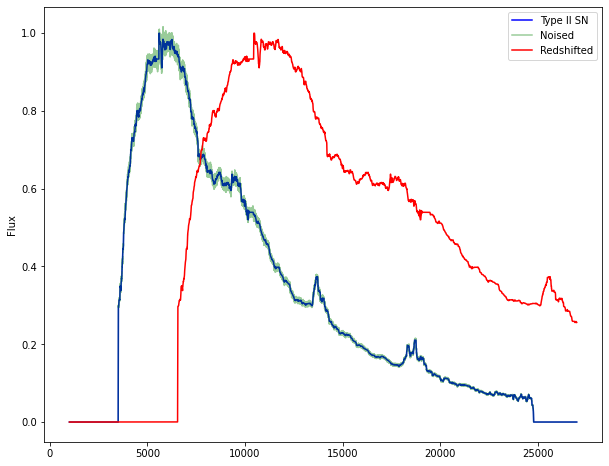

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(total['Wavelength'], total['KN_GW1708_0_smooth'], color = 'blue', label = 'Type II SN')
plt.plot(total['Wavelength'], total['KN_GW1708_0_noised_1'], color = 'green', alpha = 0.4, label = 'Noised')
plt.plot(total['Wavelength'], total['KN_GW1708_0_redshifted_1'], color = 'red', label = 'Redshifted')
plt.ylabel('Flux')
plt.legend()

Now I will create a label list according to the first two letters of each column in my final augmented dataset

In [ ]:
labels = [] #Define empty list to store the label values
# I also create an empty list for each class, just so in the end I can see how many spectra I have
# in each class
KN = []
Ia = []
Ib = []
Ic = []
II = []

# Loop to go through the final augmented dataset appending the labels to "labels" list according to
# the title of each column
for i in range(len(total.columns)):
  if 'KN' in total.columns[i]:
    label = 0
    labels.append(label)
    KN.append(label)
  if 'Ia' in total.columns[i]:
    label = 1
    labels.append(label)
    Ia.append(label)
  elif 'Ib' in total.columns[i]:
    label = 2
    labels.append(label)
    Ib.append(label)
  elif 'Ic' in total.columns[i]:
    label = 3
    labels.append(label)
    Ic.append(label)
  elif 'II' in total.columns[i]:
    label = 4
    labels.append(label)
    II.append(label)

# Printing how many spectra I have in each class
print(f'Spectra of Kilonovae: {len(KN)}')
print(f'Spectra of type Ia Supernovae: {len(Ia)}')
print(f'Spectra of type Ib Supernovae: {len(Ib)}')
print(f'Spectra of type Ic Supernovae: {len(Ic)}')
print(f'Spectra of type II Supernovae: {len(II)}')

Spectra of Kilonovae: 588
Spectra of type Ia Supernovae: 3660
Spectra of type Ib Supernovae: 720
Spectra of type Ic Supernovae: 852
Spectra of type II Supernovae: 1392


In [ ]:
# Making the list into an array
labels = np.array(labels)

Now I create two different arrays from my dataset, in one of them I use **expand_dims** from numpy and the other I don't. I do that because later on, I'll be trying to classify these spectra using a convolutional and a dense neural network, for the convolution I need an extra dimension in the data

In [ ]:
rows = [17000+i for i in range(13000)]
total2 = total.drop(rows, axis=0)
data = np.array(total2.drop(columns=['Wavelength']).T) #Exclude the wavelength column and transpose
# the dataset to make the array
data2 = np.expand_dims(data, axis=-1)

In [ ]:
data.shape

(7212, 17000)

In [ ]:
data2.shape

(7212, 17000, 1)

I have now two arrays, one for each type of neural network. My next problem is the inbalance of data. There are considerably more type Ia supernovae than others, and little type Ic supernovae. To fix that, I apply weights to each class

In [ ]:
# Computing the weights of each class using sckitlearn function

weight = compute_class_weight('balanced', np.unique(labels), labels)
weight = {i : weight[i] for i in range(5)}

print(weight)

{0: 2.453061224489796, 1: 0.3940983606557377, 2: 2.0033333333333334, 3: 1.6929577464788732, 4: 1.0362068965517242}


I proceed to split my data into training and testing using **train_test_split** function from scikit learn. It already selects randomly the data in the dataset, so I don't need to shuffle things first.

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(data,labels,test_size=0.2,stratify = labels)
train2_x, test2_x, train2_y, test2_y = train_test_split(data2,labels,test_size=0.2,stratify = labels)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)
print(train2_x.shape)
print(train2_y.shape)
print(test2_x.shape)
print(test2_y.shape)

(5769, 17000)
(5769,)
(1443, 17000)
(1443,)
(5769, 17000, 1)
(5769,)
(1443, 17000, 1)
(1443,)


I then have 3609 spectra for training and 903 for testing the neural network. Before building the neural network and evaluating the results, I still have one more thing to do. Which is using **to_categorical** function to assign the labels to categories.

In [ ]:
train_y = to_categorical(train_y)
test_y = to_categorical(test_y)
train2_y = to_categorical(train2_y)
test2_y = to_categorical(test2_y)

And finally I compute some useful things to input them into the neural networks, such as the number of outputs A.K.A the number of classes, the number of features to be analysed and the number of steps in each feature

In [ ]:
n_timesteps, n_features, n_outputs = train_x.shape[1], train_x.shape[0], train_y.shape[1]
n2_timesteps, n2_features, n2_outputs = train2_x.shape[1], train2_x.shape[2], train2_y.shape[1]

### Neural networks

Now I begin building my neural networks! I'll try two different architectures:

1. A convolutional neural network
2. A dense neural network

If you have no idea what convolutional and dense neural networks are, I recommend you take Clécio's lectures ;) (or at least try looking for some posts in [towardsdatascience.com](www.towardsdatascience.com) or [machinelearningmastery.com](www.machinelearningmastery.com), I would recommend specific posts but I think it would be best for you to look for the ones more adequate to your prior knowledge, buut if you're new at Deep Learning but has some mathematical background, than I recommend you [But what is a Neural Network](https://www.youtube.com/watch?v=aircAruvnKk&ab_channel=3Blue1Brown) video from 3blue1brown).

Anyway, I'll be using **keras** to build and train both neural networks in the next code cells. I'll plot the summary of each neural network bellow for you to understand it better

In [ ]:
# Convolutional neural network

conv = models.Sequential()
conv.add(Conv1D(filters=64, kernel_size=15, activation='relu',
                        input_shape=(n2_timesteps,n2_features)))
conv.add(MaxPooling1D(pool_size=5))
conv.add(Conv1D(filters=128, kernel_size=15, activation='relu'))
conv.add(MaxPooling1D(pool_size=5))
conv.add(Conv1D(filters=256, kernel_size=15, activation='relu'))
conv.add(MaxPooling1D(pool_size=5))
conv.add(Conv1D(filters=512, kernel_size=15, activation='relu'))
conv.add(MaxPooling1D(pool_size=5))
conv.add(Dropout(0.5))
conv.add(LSTM(1,))
conv.add(Flatten())
conv.add(Dense(128, activation='relu'))
conv.add(Dense(64, activation='relu'))
conv.add(Dense(32, activation='relu'))
conv.add(Dense(n2_outputs, activation='softmax'))

earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 30,  
                                        restore_best_weights = True)

conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
conv.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 16986, 64)         1024      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 3397, 64)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 3383, 128)         123008    
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 676, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 662, 256)          491776    
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 132, 256)          0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 118, 512)          1

In [ ]:
# Dense neural network

dens = models.Sequential()
dens.add(Dense(128, activation='relu', input_shape=(n_timesteps,)))
dens.add(Dropout(0.3))
dens.add(Dense(64, activation='relu'))
dens.add(Dropout(0.3))
dens.add(Dense(32,activation='relu'))
dens.add(Dense(n_outputs, activation = 'softmax'))

earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 20,  
                                        restore_best_weights = True)

dens.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
dens.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               2176128   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 5)                 165       
Total params: 2,186,629
Trainable params: 2,186,629
Non-trainable params: 0
____________________________________________

In [ ]:
lstm = models.Sequential()
lstm.add(LSTM(1, input_shape=(n2_timesteps,n2_features)))
lstm.add(Dropout(0.5))
lstm.add(Dense(16, activation='relu'))
lstm.add(Dense(n2_outputs, activation='softmax'))

earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 20,  
                                        restore_best_weights = True)

lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
lstm.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 1)                 12        
_________________________________________________________________
dropout_10 (Dropout)         (None, 1)                 0         
_________________________________________________________________
dense_20 (Dense)             (None, 16)                32        
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 85        
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


### Train

Building the networks was fast, now I'll perform the training of both of them simply by using **fit** function. During the training, 20% of the training set will be used for validation, therefore, there will be 2887 spectra for training the model and 722 for validating the training epochs.

In [ ]:
# Training the convolutional network

history_c = conv.fit(train2_x, train2_y, epochs = 30, validation_split=0.2,
              class_weight=weight, callbacks = [earlystopping])

Train on 4615 samples, validate on 1154 samples
Epoch 1/30
4615/4615 [==============================] - ETA: 0s - loss: 1.5722 - acc: 0.4143

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


4615/4615 [==============================] - 556s 120ms/sample - loss: 1.5722 - acc: 0.4143 - val_loss: 1.5823 - val_acc: 0.4896
Epoch 2/30
4615/4615 [==============================] - 556s 120ms/sample - loss: 1.5210 - acc: 0.3473 - val_loss: 1.6679 - val_acc: 0.1170
Epoch 3/30
4615/4615 [==============================] - 554s 120ms/sample - loss: 1.5968 - acc: 0.1768 - val_loss: 1.6721 - val_acc: 0.4887
Epoch 4/30
4615/4615 [==============================] - 553s 120ms/sample - loss: 1.5956 - acc: 0.3222 - val_loss: 1.6699 - val_acc: 0.4887
Epoch 5/30
4615/4615 [==============================] - 552s 120ms/sample - loss: 1.5954 - acc: 0.3584 - val_loss: 1.6696 - val_acc: 0.1213
Epoch 6/30
4615/4615 [==============================] - 553s 120ms/sample - loss: 1.5950 - acc: 0.2256 - val_loss: 1.6681 - val_acc: 0.1213
Epoch 7/30
4615/4615 [==============================] - 554s 120ms/sample - loss: 1.5954 - acc: 0.2134 - val_loss: 1.6721 - val_acc: 0.1872
Epoch 8/30
4615/4615 [=========

In [ ]:
# Training the dense network

history_d = dens.fit(train_x, train_y, epochs = 50, validation_split=0.2,
              class_weight=weight, callbacks = [earlystopping])

Train on 4615 samples, validate on 1154 samples
Epoch 1/50
4544/4615 [============================>.] - ETA: 0s - loss: 1.7715 - acc: 0.2676

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


4615/4615 [==============================] - 3s 569us/sample - loss: 1.7664 - acc: 0.2663 - val_loss: 1.4797 - val_acc: 0.2574
Epoch 2/50
4615/4615 [==============================] - 3s 552us/sample - loss: 1.4951 - acc: 0.2847 - val_loss: 1.4642 - val_acc: 0.3735
Epoch 3/50
4615/4615 [==============================] - 2s 536us/sample - loss: 1.4552 - acc: 0.3532 - val_loss: 1.4286 - val_acc: 0.4835
Epoch 4/50
4615/4615 [==============================] - 2s 524us/sample - loss: 1.4326 - acc: 0.4628 - val_loss: 1.4217 - val_acc: 0.4913
Epoch 5/50
4615/4615 [==============================] - 2s 534us/sample - loss: 1.4129 - acc: 0.4665 - val_loss: 1.4501 - val_acc: 0.4974
Epoch 6/50
4615/4615 [==============================] - 2s 526us/sample - loss: 1.4159 - acc: 0.4553 - val_loss: 1.4170 - val_acc: 0.4965
Epoch 7/50
4615/4615 [==============================] - 3s 549us/sample - loss: 1.3803 - acc: 0.4934 - val_loss: 1.3737 - val_acc: 0.5312
Epoch 8/50
4615/4615 [=======================

In [ ]:
history_l = lstm.fit(train2_x, train2_y, epochs = 30, validation_split=0.2,
              class_weight=weight, callbacks = [earlystopping])

Train on 4615 samples, validate on 1154 samples
Epoch 1/30
4615/4615 [==============================] - ETA: 0s - loss: 1.5875 - acc: 0.1112

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


4615/4615 [==============================] - 488s 106ms/sample - loss: 1.5875 - acc: 0.1112 - val_loss: 1.6104 - val_acc: 0.1265
Epoch 2/30
4615/4615 [==============================] - 491s 106ms/sample - loss: 1.5604 - acc: 0.1365 - val_loss: 1.5824 - val_acc: 0.1681
Epoch 3/30
4615/4615 [==============================] - 493s 107ms/sample - loss: 1.5386 - acc: 0.3036 - val_loss: 1.5615 - val_acc: 0.5329
Epoch 4/30
4615/4615 [==============================] - 492s 107ms/sample - loss: 1.5289 - acc: 0.3655 - val_loss: 1.5489 - val_acc: 0.5373
Epoch 5/30
4615/4615 [==============================] - 494s 107ms/sample - loss: 1.5249 - acc: 0.3339 - val_loss: 1.5419 - val_acc: 0.5390
Epoch 6/30
4615/4615 [==============================] - 493s 107ms/sample - loss: 1.5237 - acc: 0.3330 - val_loss: 1.5343 - val_acc: 0.5399
Epoch 7/30
4615/4615 [==============================] - 494s 107ms/sample - loss: 1.5224 - acc: 0.3281 - val_loss: 1.5296 - val_acc: 0.5416
Epoch 8/30
4615/4615 [=========

### Evaluation

The model is trained and now it is time to check how well it learned. This subsection is dedicated to evaluating the model through different metrics.

The first two metrics to be evaluated is the **loss** and the **accuracy**. The **loss** here was calculated using *categorical_crossentropy*, which measures the relation between the probability predicted by the NN for a given class and the actual probability. For example, in my situation, I have 5 classes, the probability vector for my problem is given by

$$ P = \begin{pmatrix}
P(KN) \\
P(Ia) \\
P(Ib) \\
P(Ic) \\
P(II) \\
\end{pmatrix}$$

where each entry in the vector represents the probability that a given spectrum belongs to a specific type of event. The neural network assigns probabilities for each class right? So the cross-entropy is a measurment comparing the probability given by the neural network to a specific class (let's call it $q(x)$, where $x$  is the class) and the actual probability of that class (let's call it $P(x)$).

$$L(x) = -P(x)\cdot \log[q(x)]$$

So, for a kilonva spectrum, we may calculate the loss $L(x)$ by $-P(KN)\cdot\log[q(KN)]$. If the spectrum really belongs to a kilonova, than $P(KN) = 1$ and the loss is minimum if the neural network assigns it a probability of 1 as well (because $\log(1)=0$).

So, cross-entropy is expected to decrease as the probabilities the NN assigns to the correct class approaches 1. In the perfect situation, the loss (which is measured by the cross-entropy) would be 0. If you didn't understand it quite well, than try reading [Cross-entropy for classification](https://towardsdatascience.com/cross-entropy-for-classification-d98e7f974451).

The **accuracy** is easier to explain, it simply gets the class with higher probability and assign it as the predicted label for the spectrum, then checks if the NN got it right or not. So, the accuracy is just a measurment how much the neural network assigned correct labels to the spectra, a accuracy of 90% would mean that the NN got the correct prediction 90% of the time.

In [ ]:
# Plot of the loss throughout the epochs. history_c will plot the loss of the conv NN, just
# uncomment history_d to see the plot of the dense NN

plt.plot(history_c.history['loss'], color = 'red', label = 'Training loss Conv')
plt.plot(history_c.history['val_loss'], color = 'blue', label = 'Validation loss Conv')
#plt.plot(history_d.history['loss'], color = 'darkred', label = 'Training loss Dense')
#plt.plot(history_d.history['val_loss'], color = 'darkblue', label = 'Validation loss Dense')
plt.xlabel('Nº epochs')
plt.ylabel('Loss')
plt.legend()

NameError: ignored

In [ ]:
# Plot of accuracy

plt.plot(history_c.history['acc'], color = 'red', label = 'Training accuracy Conv')
plt.plot(history_c.history['val_acc'], color = 'blue', label = 'Validation accuracy Conv')
#plt.plot(history_d.history['acc'], color = 'darkred', label = 'Training accuracy Dense')
#plt.plot(history_d.history['val_acc'], color = 'darkblue', label = 'Validation accuracy Dense')
plt.xlabel('Nº epochs')
plt.ylabel('Accuracy')
plt.legend()

NameError: ignored

So, here I had an overfitting problem. See how the training loss and training accuracy is much better than the validation loss and accuracy? That means that the NN is not being able to generalize the learning process. It is like a child memorizing the answers of his/her homework to get a good score, but failing the test because it didn't really learn to generalize the concepts presented in the homework.

In the end, the loss of training and validation for the two types of NN were:

| Metrics        | Dense           | Conv  |
| ------------- |:-------------:| -----:|
| loss train | 1.239 | 0.337 |
| loss valid | 1.286 |   0.652 |
| acc train | 0.388 | 0.862 |
| acc valid | 0.437 | 0.762 |

As you can see, the dense network had a lower overfitting, BUT it performed way more poorly than the convolutional network. If you want, try changing the architecture of both networks to see if the results improve.

---

Now I will check the performance of the NN is the testing set. First we tell the NN to give us some predictions concerning the testing set

In [ ]:
pred_conv = conv.predict(test2_x)
pred_dense = dens.predict(test_x)

Now I'll plot the ROC curve. For that metric, I won't get into a lot of details, but I'll leave it here an excellent blog post about the meaning of the ROC curve: [Understanding AUC-ROC curve](https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5). Briefly, the ROC curve may tell us how well does the NN classify each type of spectrum. The area under the curve (AUC) represents the probability that the NN will be able to distinguish a given class from the others.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


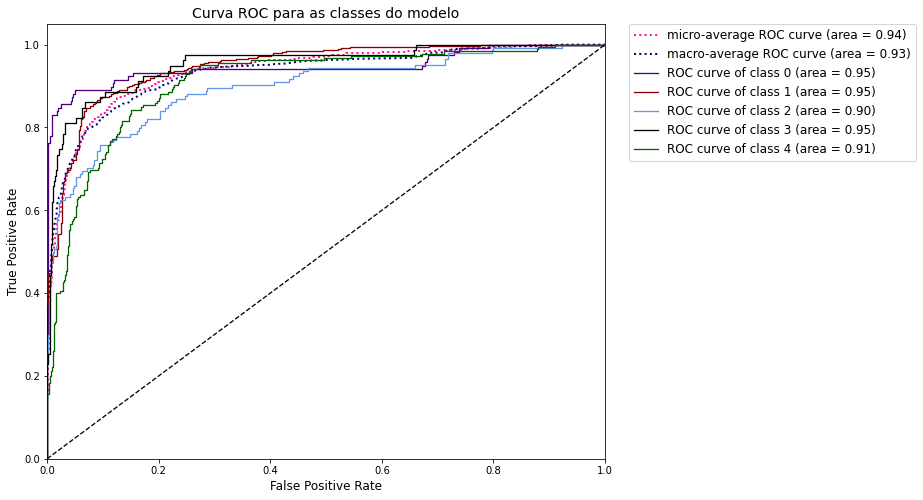

In [ ]:
### ROC curve

pred = pred_conv #Change this to pred_dense to see the results of the dense NN

n_classes = test_y.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(test2_y[:, i], pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(test2_y.ravel(), pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(figsize = (10,8))#, dpi = 300)
lw = 1.3
plt.plot(fpr["micro"], tpr["micro"],
          label='micro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["micro"]),
          color='deeppink', linestyle=':', linewidth=2)

plt.plot(fpr["macro"], tpr["macro"],
          label='macro-average ROC curve (area = {0:0.2f})'
                ''.format(roc_auc["macro"]),
          color='navy', linestyle=':', linewidth=2)

colors = cycle(['indigo', 'darkred', 'cornflowerblue', 'black', 'darkgreen', 'magenta', 'goldenrod', 'darkcyan'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.title('Curva ROC para as classes do modelo', fontsize = 14)
lgd = plt.legend(bbox_to_anchor=(1.3, 1), loc='upper center', borderaxespad=0., fontsize = 12)

Nice, it seems that although I had an overfitting problem back at the beginning, the conv NN maneged to learn enough to distinguish the classes most of the time, some more than others. As you can see, the AUC score for the classes 0, 1 and 3 is around 0.95 (the maximum is 1). These classes are *Kilonova*, *Supernova Type Ia* and *Supernova Type Ic*. So these are classes that are easier for the NN to classify, while the class 2 is the most difficult one (AUC = 0.9).

The averages are both somewhat good (0.94 for the micro-average and 0.93 for the macro-average). The macro-average will compute the AUC independently for each class and then take the average (hence treating all classes equally), whereas the micro-average will aggregate the contributions of all classes to compute the average AUC score. In my multi-class classification setup, micro-average is preferable due to class imbalance (i.e I have many more examples of one class than of other classes).

Next, I will take a look at what I personally consider the most important metric for classification problems, the confusion matrix. It is a matrix relating the real labels for the testing set with the predicted labels by the neural network. I'll only be evaluating the conv here (since the dense performed way worse in the training/validation, but if exchange *pred = pred_conv* by *pred = pred_dense* you'll be able to see the same results for the dense NN)


<Figure size 432x288 with 0 Axes>

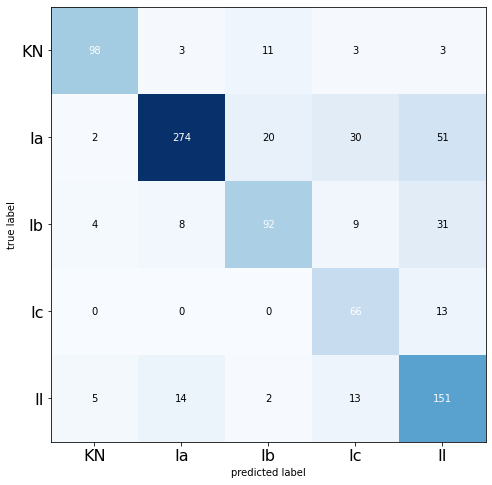

In [ ]:
# Getting the predicted label as the maximum value of probability in the probability vector
pred = np.argmax(pred_conv, axis=-1)

# Original labels
test_labels = np.argmax(test2_y, axis=-1)

cm2  = confusion_matrix(test_labels, pred)
plt.figure()
plot_confusion_matrix(cm2,figsize=(12,8), hide_ticks=True, cmap=plt.cm.Blues)
plt.xticks(range(5), ['KN', 'Ia', 'Ib', 'Ic', 'II'], fontsize=16)
plt.yticks(range(5), ['KN', 'Ia', 'Ib', 'Ic', 'II'], fontsize=16)
plt.show()

There is a lot here! So, each row represents the real label of a spectrum, while the column represents the predicted label. For example, the in the first line, all spectra are actually kilonova spectra, and each column represents the assigned label by the NN. So, in the first line

$$Kilonva = \begin{pmatrix}
98 & 3 & 11 & 3 & 3
\end{pmatrix}$$

the first column (98) is the amount of spectra that were kilonova spectra and were assigned as kilonova spectra by the NN, while the second column (3) is the amount of spectra that were kilonova spectra and were assigned as supernova type Ia spectra by the NN, and so on.

As you can see, a lot of type Ia spectra were classified as belonging to other classes and a lot of the classified Ib and II spectra were actually other things. I can quantify this using the precision/recall score!

The precision score tells us how many spectra classified as X were actually X. The recall tells us how many of the X class spectra were correctly identified as X class spectra. If you want to read more about it check [Precision and recall](https://en.wikipedia.org/wiki/Precision_and_recall) on wikipedia.

In [ ]:
# Creating a dictionary with the relevant metrics of the classification using classification_report
report = classification_report(test_labels, pred, labels = [0, 1, 2, 3, 4],
                      target_names = ['KN', 'Ia', 'Ib', 'Ic', 'II'], output_dict=True)

# Making a dataframe out of the dictionary
report = pd.DataFrame(report)

In [ ]:
report

,KN,Ia,Ib,Ic,II,accuracy,macro avg,weighted avg
precision,0.899083,0.916388,0.736000,0.545455,0.606426,0.754153,0.740670,0.789406
recall,0.830508,0.726790,0.638889,0.835443,0.816216,0.754153,0.769569,0.754153
f1-score,0.863436,0.810651,0.684015,0.660000,0.695853,0.754153,0.742791,0.760655
support,118.000000,377.000000,144.000000,79.000000,185.000000,0.754153,903.000000,903.000000


As a final metric, I will check how the precision and recall vary as I change the classification threshold

In [ ]:
# For each class
pred = conv.predict(test2_x)
n_classes = test2_y.shape[1]
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(test2_y[:, i],
                                                        pred[:, i])
    average_precision[i] = average_precision_score(test2_y[:, i], pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(test2_y.ravel(),
    pred.ravel())
average_precision["micro"] = average_precision_score(test2_y, pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))

Average precision score, micro-averaged over all classes: 0.84


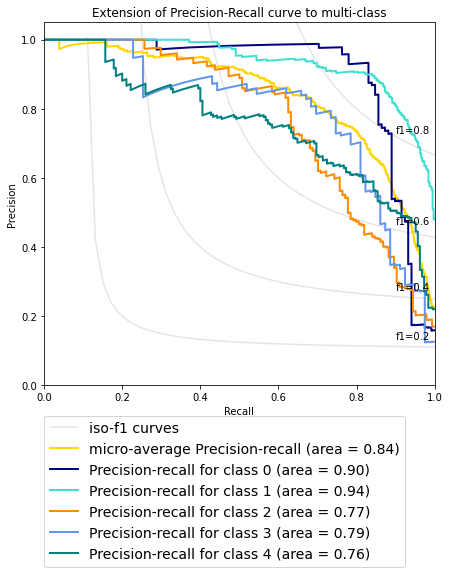

In [ ]:
from itertools import cycle
# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(7, 8))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -0.5), prop=dict(size=14))

plt.show()

### K-Fold

Everything seems nice, but I need to be sure that my results are generalizable. For that, I apply a k-fold! The k-fold is a way of repeating the training of the NN multiple times using different samples of the complete dataset each time.

To achieve that, I write a loop over the whole procedure of test splitting the data, building the network, training and acquiring the metrics. Remember that the **train_test_split** function in scikit learn selects random samples in my dataset, so at each iteration on the loop the training sample will be different due to the random chosing. That will prevent me from getting a biased training set by accident.

I redefine the network in each iteration as well to initialize it with random weights again, further preventing any bias. And finally I create empty lists where I'll be storing the values of the metrics in each iteration.

In [ ]:
folds = 5

# Empty lists to store the value of the first metrics (loss and accuracy)
acc_dense = []
acc_val_dense = []
loss_dense = []
loss_val_dense = []
acc_conv = []
acc_val_conv = []
loss_conv = []
loss_val_conv = []

# Storing the precision, recall, fpr and tpr for the dense NN
precision_d = [{}]*folds
recall_d = [{}]*folds

fpr_d = [{}]*folds
tpr_d = [{}]*folds

# Same thing for the conv NN
precision_c = [{}]*folds
recall_c = [{}]*folds
average_precision_c = [{}]*folds

fpr_c = [{}]*folds
tpr_c = [{}]*folds
roc_auc_c = [{}]*folds

# Loop for the K-fold
for i in range(folds):
  # Train-test splitting
  train_x, test_x, train_y, test_y = train_test_split(data,labels,test_size=0.2,stratify = labels)
  train2_x, test2_x, train2_y, test2_y = train_test_split(data2,labels,test_size=0.2,stratify = labels)

  # Assigning labels to categories
  train_y = to_categorical(train_y)
  test_y = to_categorical(test_y)
  train2_y = to_categorical(train2_y)
  test2_y = to_categorical(test2_y)

  n_timesteps, n_features, n_outputs = train_x.shape[0], train_x.shape[1], train_y.shape[1]
  n2_timesteps, n2_features, n2_outputs = train2_x.shape[1], train2_x.shape[2], train2_y.shape[1]

  # Redefining the networks
  conv = models.Sequential()
  conv.add(Conv1D(filters=16, kernel_size=10, activation='relu', input_shape=(n2_timesteps,n2_features)))
  conv.add(Dropout(0.5))
  conv.add(Flatten())
  conv.add(Dense(32, activation='relu'))
  conv.add(Dense(n2_outputs, activation='softmax'))

  earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 30,  
                                        restore_best_weights = True)

  conv.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  dens = models.Sequential()
  dens.add(Dense(128, activation='relu', input_shape=(n_features,)))
  dens.add(Dropout(0.3))
  dens.add(Dense(64, activation='relu'))
  dens.add(Dropout(0.3))
  dens.add(Dense(32,activation='relu'))
  dens.add(Dense(n_outputs, activation = 'softmax'))

  earlystopping = callbacks.EarlyStopping(monitor ="val_loss",  
                                        mode ="min", patience = 60,  
                                        restore_best_weights = True)

  dens.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

  # Training them
  history = conv.fit(train2_x, train2_y, epochs = 30, validation_split=0.2,
              class_weight=weight, callbacks = [earlystopping])
  
  history2 = dens.fit(train_x, train_y, epochs = 60, validation_split=0.2,
              class_weight=weight, callbacks = [earlystopping])
  
  # Storing the values of each metric
  loss_conv.append(history.history['loss'])
  loss_val_conv.append(history.history['val_loss'])
  loss_dense.append(history2.history['loss'])
  loss_val_dense.append(history2.history['val_loss'])
  acc_conv.append(history.history['acc'])
  acc_val_conv.append(history.history['val_acc'])
  acc_dense.append(history2.history['acc'])
  acc_val_dense.append(history2.history['val_acc'])

  # Creating predictions in the testing set
  pred_conv = conv.predict(test2_x)
  pred_dense = dens.predict(test_x)

  n_classes = test2_y.shape[1]

  # Storing the values of precision and recall
  for j in range(n_classes):
      precision_d[i][j], recall_d[i][j], _ = precision_recall_curve(test_y[:, j],pred_dense[:, j])
      precision_c[i][j], recall_c[i][j], _ = precision_recall_curve(test2_y[:, j],pred_conv[:, j])

  # Storing the values of fpr and tpr
  for j in range(n_classes):
    fpr_d[i][j], tpr_d[i][j], _ = roc_curve(test_y[:,j], pred_dense[:,j])
    fpr_c[i][j], tpr_c[i][j], _ = roc_curve(test2_y[:,j], pred_conv[:,j])

Train on 2887 samples, validate on 722 samples
Epoch 1/30
2887/2887 [==============================] - 27s 9ms/sample - loss: 1.4727 - acc: 0.3027 - val_loss: 1.3260 - val_acc: 0.3463
Epoch 2/30
2887/2887 [==============================] - 27s 9ms/sample - loss: 1.2243 - acc: 0.4267 - val_loss: 1.1844 - val_acc: 0.4889
Epoch 3/30
2887/2887 [==============================] - 27s 9ms/sample - loss: 1.0980 - acc: 0.4926 - val_loss: 1.1744 - val_acc: 0.4806
Epoch 4/30
2887/2887 [==============================] - 27s 9ms/sample - loss: 1.0507 - acc: 0.5331 - val_loss: 1.1335 - val_acc: 0.5222
Epoch 5/30
2887/2887 [==============================] - 27s 9ms/sample - loss: 0.9766 - acc: 0.5698 - val_loss: 1.0838 - val_acc: 0.5554
Epoch 6/30
2887/2887 [==============================] - 27s 9ms/sample - loss: 0.9356 - acc: 0.5951 - val_loss: 1.1851 - val_acc: 0.5028
Epoch 7/30
2887/2887 [==============================] - 27s 9ms/sample - loss: 0.8708 - acc: 0.6280 - val_loss: 1.0127 - val_acc: 0

The K-fold is done and now it is time to evaluate the results of it. Firstly I'll turn all these lists into arrays

In [ ]:
loss_conv = np.array(loss_conv)
loss_val_conv = np.array(loss_val_conv)
loss_dense = np.array(loss_dense)
loss_val_dense = np.array(loss_val_dense)
acc_conv = np.array(acc_conv)
acc_val_conv = np.array(acc_val_conv)
acc_dense = np.array(acc_dense)
acc_val_dense = np.array(acc_val_dense)

Now I'll use **mean** and **std** functions in *numpy* to get the average and the standard deviation of the loss and accuracy in each epoch during the k-fold

In [ ]:
loss_conv_mean = np.mean(loss_conv, axis = 0)
loss_conv_std = np.std(loss_conv, axis = 0)
loss_val_conv_mean = np.mean(loss_val_conv, axis = 0)
loss_val_conv_std = np.std(loss_val_conv, axis = 0)
loss_dense_mean = np.mean(loss_dense, axis = 0)
loss_dense_std = np.std(loss_dense, axis = 0)
loss_val_dense_mean = np.mean(loss_val_dense, axis = 0)
loss_val_dense_std = np.std(loss_val_dense, axis = 0)

acc_conv_mean = np.mean(acc_conv, axis = 0)
acc_conv_std = np.std(acc_conv, axis = 0)
acc_val_conv_mean = np.mean(acc_val_conv, axis = 0)
acc_val_conv_std = np.std(acc_val_conv, axis = 0)
acc_dense_mean = np.mean(acc_dense, axis = 0)
acc_dense_std = np.std(acc_dense, axis = 0)
acc_val_dense_mean = np.mean(acc_val_dense, axis = 0)
acc_val_dense_std = np.std(acc_val_dense, axis = 0)

And finally, plot the average behavior of those metrics with the standard deviation

Text(0.5, 1.0, 'Dense')

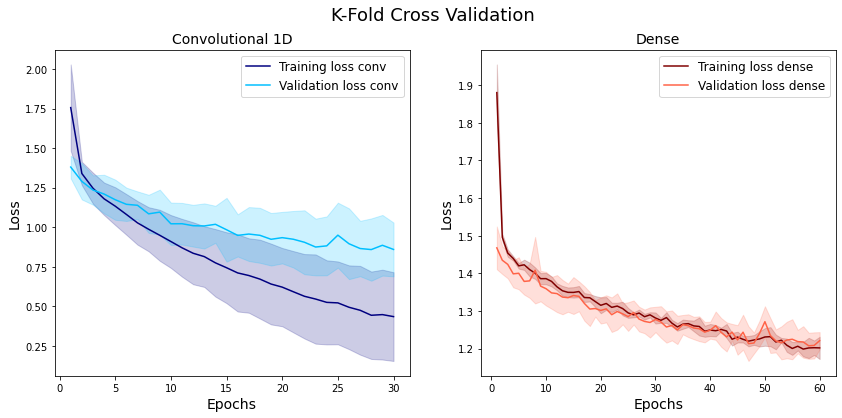

In [ ]:
epoch = np.linspace(1, 30, 30)
epoch_d = np.linspace(1, 60, 60)

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
ax1.plot(epoch, loss_conv_mean, color = 'navy', label = 'Training loss conv')
ax1.fill_between(epoch, loss_conv_mean-loss_conv_std, loss_conv_mean+loss_conv_std, color = 'navy',
                 alpha = 0.2)
ax1.plot(epoch, loss_val_conv_mean, color = 'deepskyblue', label = 'Validation loss conv')
ax1.fill_between(epoch, loss_val_conv_mean-loss_val_conv_std, loss_val_conv_mean+loss_val_conv_std,
                 color = 'deepskyblue', alpha = 0.2)
ax2.plot(epoch_d, loss_dense_mean, color = 'maroon', label = 'Training loss dense')
ax2.fill_between(epoch_d, loss_dense_mean-loss_dense_std, loss_dense_mean+loss_dense_std, color = 'maroon',
                 alpha = 0.2)
ax2.plot(epoch_d, loss_val_dense_mean, color = 'tomato', label = 'Validation loss dense')
ax2.fill_between(epoch_d, loss_val_dense_mean-loss_val_dense_std, loss_val_dense_mean+loss_val_dense_std,
                 color = 'tomato', alpha = 0.2)
ax1.legend(loc='upper right', fontsize = 12)
ax2.legend(loc='upper right', fontsize = 12)
ax1.set_xlabel('Epochs', fontsize = 14)
ax1.set_ylabel('Loss', fontsize = 14)
ax2.set_xlabel('Epochs', fontsize = 14)
ax2.set_ylabel('Loss', fontsize = 14)
fig.suptitle('K-Fold Cross Validation', fontsize = 18)
ax1.set_title('Convolutional 1D', fontsize = 14)
ax2.set_title('Dense', fontsize= 14)

Text(0.5, 1.0, 'Dense')

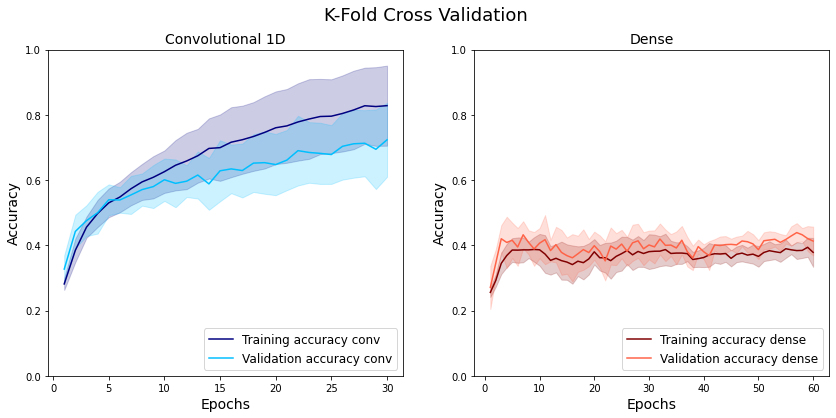

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))
ax1.plot(epoch, acc_conv_mean, color = 'navy', label = 'Training accuracy conv')
ax1.fill_between(epoch, acc_conv_mean-acc_conv_std, acc_conv_mean+acc_conv_std, color = 'navy',
                 alpha = 0.2)
ax1.plot(epoch, acc_val_conv_mean, color = 'deepskyblue', label = 'Validation accuracy conv')
ax1.fill_between(epoch, acc_val_conv_mean-acc_val_conv_std, acc_val_conv_mean+acc_val_conv_std,
                 color = 'deepskyblue', alpha = 0.2)
ax2.plot(epoch_d, acc_dense_mean, color = 'maroon', label = 'Training accuracy dense')
ax2.fill_between(epoch_d, acc_dense_mean-acc_dense_std, acc_dense_mean+acc_dense_std, color = 'maroon',
                 alpha = 0.2)
ax2.plot(epoch_d, acc_val_dense_mean, color = 'tomato', label = 'Validation accuracy dense')
ax2.fill_between(epoch_d, acc_val_dense_mean-acc_val_dense_std, acc_val_dense_mean+acc_val_dense_std,
                 color = 'tomato', alpha = 0.2)
ax1.legend(loc='lower right', fontsize = 12)
ax1.set_xlabel('Epochs', fontsize = 14)
ax1.set_ylabel('Accuracy', fontsize = 14)
ax2.legend(loc='lower right', fontsize = 12)
ax2.set_xlabel('Epochs', fontsize = 14)
ax2.set_ylabel('Accuracy', fontsize = 14)
ax1.set_ylim(0,1)
ax2.set_ylim(0,1)
fig.suptitle('K-Fold Cross Validation', fontsize = 18)
ax1.set_title('Convolutional 1D', fontsize = 14)
ax2.set_title('Dense', fontsize= 14)

Now I'll be ploting the precision-recall curve after the k-fold

In [ ]:
# Empty lists for each class

precisionKN_d = []
precisionIa_d = []
precisionIb_d = []
precisionIc_d = []
precisionII_d = []

recallKN_d = []
recallIa_d = []
recallIb_d = []
recallIc_d = []
recallII_d = []

# Storing the values of precision in the lists
for i in range(folds):
  precisionKN_d.append(np.array(precision_d)[i][0])
  precisionIa_d.append(np.array(precision_d)[i][1])
  precisionIb_d.append(np.array(precision_d)[i][2])
  precisionIc_d.append(np.array(precision_d)[i][3])
  precisionII_d.append(np.array(precision_d)[i][4])
  recallKN_d.append(np.array(recall_d)[i][0])
  recallIa_d.append(np.array(recall_d)[i][1])
  recallIb_d.append(np.array(recall_d)[i][2])
  recallIc_d.append(np.array(recall_d)[i][3])
  recallII_d.append(np.array(recall_d)[i][4])

#--------------------------------------------------------------#
# Same thing for the conv NN

precisionKN_c = []
precisionIa_c = []
precisionIb_c = []
precisionIc_c = []
precisionII_c = []

recallKN_c = []
recallIa_c = []
recallIb_c = []
recallIc_c = []
recallII_c = []

for i in range(folds):
  precisionKN_c.append(np.array(precision_c)[i][0])
  precisionIa_c.append(np.array(precision_c)[i][1])
  precisionIb_c.append(np.array(precision_c)[i][2])
  precisionIc_c.append(np.array(precision_c)[i][3])
  precisionII_c.append(np.array(precision_c)[i][4])
  recallKN_c.append(np.array(recall_c)[i][0])
  recallIa_c.append(np.array(recall_c)[i][1])
  recallIb_c.append(np.array(recall_c)[i][2])
  recallIc_c.append(np.array(recall_c)[i][3])
  recallII_c.append(np.array(recall_c)[i][4])

Text(0.5, 0.98, 'Precision-Recall')

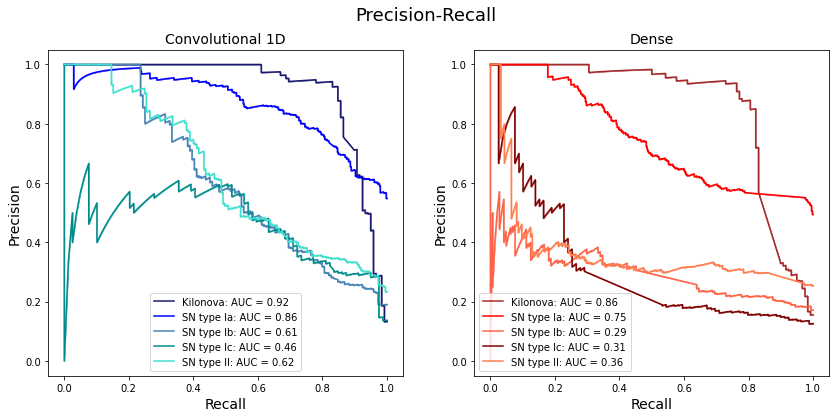

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,6))

ax1.plot(np.average(np.vstack(recallKN_c), axis = 0),np.average(np.vstack(precisionKN_c), axis = 0), label = r'Kilonova: AUC = %.2f'%auc(np.average(np.vstack(recallKN_c), axis = 0), np.average(np.vstack(precisionKN_c), axis = 0)), color = 'midnightblue')
ax1.plot(np.average(np.vstack(recallIa_c), axis = 0),np.average(np.vstack(precisionIa_c), axis = 0), label = r'SN type Ia: AUC = %.2f'%auc(np.average(np.vstack(recallIa_c), axis = 0), np.average(np.vstack(precisionIa_c), axis = 0)), color = 'blue')
ax1.plot(np.average(np.vstack(recallIb_c), axis = 0),np.average(np.vstack(precisionIb_c), axis = 0), label = r'SN type Ib: AUC = %.2f'%auc(np.average(np.vstack(recallIb_c), axis = 0), np.average(np.vstack(precisionIb_c), axis = 0)), color = 'steelblue')
ax1.plot(np.average(np.vstack(recallIc_c), axis = 0),np.average(np.vstack(precisionIc_c), axis = 0), label = r'SN type Ic: AUC = %.2f'%auc(np.average(np.vstack(recallIc_c), axis = 0), np.average(np.vstack(precisionIc_c), axis = 0)), color = 'darkcyan')
ax1.plot(np.average(np.vstack(recallII_c), axis = 0),np.average(np.vstack(precisionII_c), axis = 0), label = r'SN type II: AUC = %.2f'%auc(np.average(np.vstack(recallII_c), axis = 0), np.average(np.vstack(precisionII_c), axis = 0)), color = 'turquoise')
ax1.fill_between(np.average(np.vstack(recallKN_c), axis = 0), np.std(np.vstack(precisionKN_c), axis = 0) + np.average(np.vstack(precisionKN_c), axis = 0), - np.std(np.vstack(precisionKN_c), axis = 0) + np.average(np.vstack(precisionKN_c), axis = 0), color = 'midnightblue', alpha = 0.5)
ax1.fill_between(np.average(np.vstack(recallIa_c), axis = 0), np.std(np.vstack(precisionIa_c), axis = 0) + np.average(np.vstack(precisionIa_c), axis = 0), - np.std(np.vstack(precisionIa_c), axis = 0) + np.average(np.vstack(precisionIa_c), axis = 0), color = 'blue', alpha = 0.5)
ax1.fill_between(np.average(np.vstack(recallIb_c), axis = 0), np.std(np.vstack(precisionIb_c), axis = 0) + np.average(np.vstack(precisionIb_c), axis = 0), - np.std(np.vstack(precisionIb_c), axis = 0) + np.average(np.vstack(precisionIb_c), axis = 0), color = 'steelblue', alpha = 0.5)
ax1.fill_between(np.average(np.vstack(recallIc_c), axis = 0), np.std(np.vstack(precisionIc_c), axis = 0) + np.average(np.vstack(precisionIc_c), axis = 0), - np.std(np.vstack(precisionIc_c), axis = 0) + np.average(np.vstack(precisionIc_c), axis = 0), color = 'darkcyan', alpha = 0.5)
ax1.fill_between(np.average(np.vstack(recallII_c), axis = 0), np.std(np.vstack(precisionII_c), axis = 0) + np.average(np.vstack(precisionII_c), axis = 0), - np.std(np.vstack(precisionII_c), axis = 0) + np.average(np.vstack(precisionII_c), axis = 0), color = 'turquoise', alpha = 0.5)

ax1.set_xlabel(r'Recall', fontsize = 14)
ax1.set_ylabel(r'Precision', fontsize = 14)
ax1.set_title(r'Convolutional 1D', fontsize = 14)
ax1.legend()

ax2.plot(np.average(np.vstack(recallKN_d), axis = 0),np.average(np.vstack(precisionKN_d), axis = 0), label = r'Kilonova: AUC = %.2f'%auc(np.average(np.vstack(recallKN_d), axis = 0), np.average(np.vstack(precisionKN_d), axis = 0)), color = 'brown')
ax2.plot(np.average(np.vstack(recallIa_d), axis = 0),np.average(np.vstack(precisionIa_d), axis = 0), label = r'SN type Ia: AUC = %.2f'%auc(np.average(np.vstack(recallIa_d), axis = 0), np.average(np.vstack(precisionIa_d), axis = 0)), color = 'red')
ax2.plot(np.average(np.vstack(recallIb_d), axis = 0),np.average(np.vstack(precisionIb_d), axis = 0), label = r'SN type Ib: AUC = %.2f'%auc(np.average(np.vstack(recallIb_d), axis = 0), np.average(np.vstack(precisionIb_d), axis = 0)), color = 'tomato')
ax2.plot(np.average(np.vstack(recallIc_d), axis = 0),np.average(np.vstack(precisionIc_d), axis = 0), label = r'SN type Ic: AUC = %.2f'%auc(np.average(np.vstack(recallIc_d), axis = 0), np.average(np.vstack(precisionIc_d), axis = 0)), color = 'maroon')
ax2.plot(np.average(np.vstack(recallII_d), axis = 0),np.average(np.vstack(precisionII_d), axis = 0), label = r'SN type II: AUC = %.2f'%auc(np.average(np.vstack(recallII_d), axis = 0), np.average(np.vstack(precisionII_d), axis = 0)), color = 'coral')
ax2.fill_between(np.average(np.vstack(recallKN_d), axis = 0), np.std(np.vstack(precisionKN_d), axis = 0) + np.average(np.vstack(precisionKN_d), axis = 0), - np.std(np.vstack(precisionKN_d), axis = 0) + np.average(np.vstack(precisionKN_d), axis = 0), color = 'brown', alpha = 0.5)
ax2.fill_between(np.average(np.vstack(recallIa_d), axis = 0), np.std(np.vstack(precisionIa_d), axis = 0) + np.average(np.vstack(precisionIa_d), axis = 0), - np.std(np.vstack(precisionIa_d), axis = 0) + np.average(np.vstack(precisionIa_d), axis = 0), color = 'red', alpha = 0.5)
ax2.fill_between(np.average(np.vstack(recallIb_d), axis = 0), np.std(np.vstack(precisionIb_d), axis = 0) + np.average(np.vstack(precisionIb_d), axis = 0), - np.std(np.vstack(precisionIb_d), axis = 0) + np.average(np.vstack(precisionIb_d), axis = 0), color = 'tomato', alpha = 0.5)
ax2.fill_between(np.average(np.vstack(recallIc_d), axis = 0), np.std(np.vstack(precisionIc_d), axis = 0) + np.average(np.vstack(precisionIc_d), axis = 0), - np.std(np.vstack(precisionIc_d), axis = 0) + np.average(np.vstack(precisionIc_d), axis = 0), color = 'maroon', alpha = 0.5)
ax2.fill_between(np.average(np.vstack(recallII_d), axis = 0), np.std(np.vstack(precisionII_d), axis = 0) + np.average(np.vstack(precisionII_d), axis = 0), - np.std(np.vstack(precisionII_d), axis = 0) + np.average(np.vstack(precisionII_d), axis = 0), color = 'coral', alpha = 0.5)

ax2.set_xlabel(r'Recall', fontsize = 14)
ax2.set_ylabel(r'Precision', fontsize = 14)
ax2.set_title(r'Dense', fontsize = 14)
ax2.legend()

fig.suptitle('Precision-Recall', fontsize = 18)

### Clécio's challenge

Finally, with the NN trained and evaluated, I proceed to the final step of applying it to some real data provided by Clécio. The goal of this challenge is to correctly identify two objects according to their spectrum using my NN.

Clécio sent me these spectra by email and I uploaded them into my google drive. All I know is that they are not normalized, not smoothed and not at redshift 0. So before classifying them, I smooth them with the same smoothing window used in the kilonova spectra and normalize both of them. Hopefully the redshift will not be a problem given the network was trained with several values of redshift for each spectrum.

In [ ]:
# Opening the spectra

obj_1 = '/content/gdrive/My Drive/DeepLearning/Astrodash/Object01.dat'
obj_2 = '/content/gdrive/My Drive/DeepLearning/Astrodash/Object02.dat'
object_1 = pd.read_csv(obj_1, sep = '  ', header = None)
object_2 = pd.read_csv(obj_2, sep = '  ', header = None)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


In [ ]:
# Transforming both of them into an array
object_1 = np.array(object_1)
object_2 = np.array(object_2)

Text(0.5, 1.0, 'Object 1')

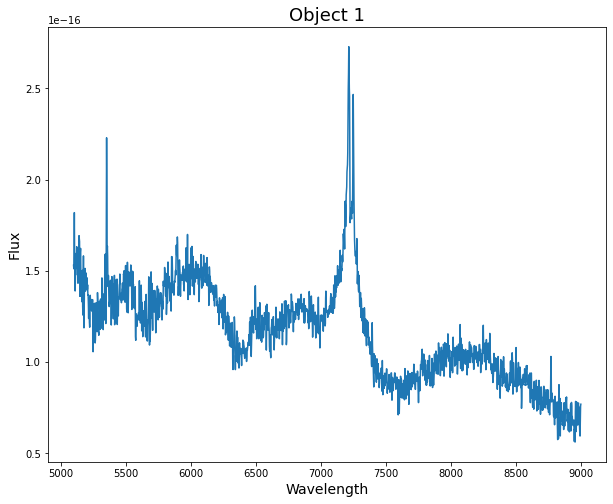

In [ ]:
# Ploting the first object
plt.figure(figsize=(10,8))
plt.plot(object_1[:,0], object_1[:,1])
plt.xlabel('Wavelength', fontsize = 14)
plt.ylabel('Flux', fontsize = 14)
plt.title('Object 1', fontsize = 18)

In [ ]:
# Smoothing, normalizing and interpooling
y_smooth = medfilt(object_1[:,1], 71)
object_norm = normalize(y_smooth)
x, y = interpol(object_1[:,0], object_norm)

y_smooth2 = medfilt(object_2[:,1], 71)
object_norm2 = normalize(y_smooth2)
x2, y2 = interpol(object_2[:,0], object_norm2)

Text(0.5, 1.0, 'Object 1')

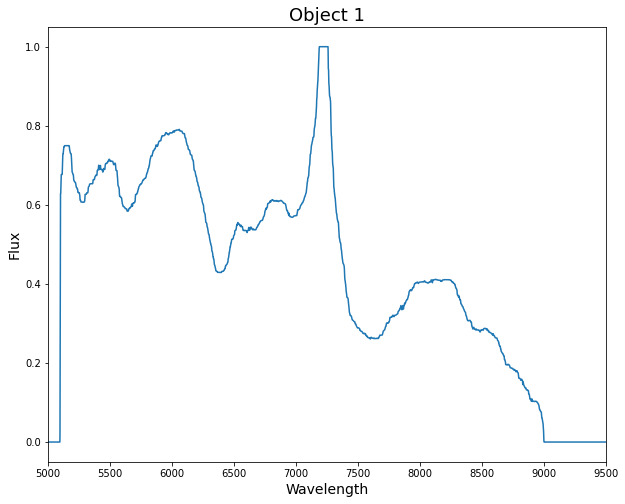

In [ ]:
# Checking the final result
plt.figure(figsize=(10,8))
plt.plot(x, y)
plt.xlim(5000,9500)
plt.xlabel('Wavelength', fontsize = 14)
plt.ylabel('Flux', fontsize = 14)
plt.title('Object 1', fontsize = 18)

In [ ]:
# Expanding dims and cutting the spectrum at the wavelenght limit of 17000 angstroms
y_test = np.expand_dims(y[:17000], axis = 0)

In [ ]:
# Performing predictions
pred_c = conv.predict(np.expand_dims(y_test, axis = -1))
pred_d = dens.predict(y_test)

Text(0.5, 1.0, 'Object 1')

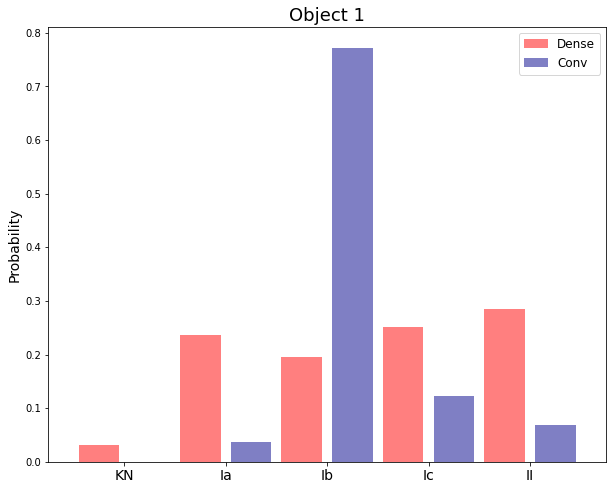

In [ ]:
# Visualizing the result
plt.figure(figsize=(10,8))
plt.bar([1,3,5,7,9], pred_d[0], color = 'red', alpha = 0.5, label = 'Dense')
plt.bar([2,4,6,8,10], pred_c[0], color = 'darkblue', alpha = 0.5, label = 'Conv')
plt.xticks(ticks=[1.5,3.5,5.5,7.5,9.5], labels = ['KN', 'Ia', 'Ib', 'Ic', 'II'], fontsize = 14)
plt.ylabel('Probability', fontsize = 14)
plt.legend(loc='upper right', fontsize = 12)
plt.xlim(0, 11)
plt.title('Object 1', fontsize = 18)

Sadly, I failed in this task. The object 1 is a type Ia supernova while object 2 is a type II supernova. The conv NN predicted object 1 is a type Ib supernova and object 2 is a type Ic supernova